# INFO623 FINAL PROJECT SPRING 2021/2021

## Mary M Lucas

### Co-Authorship Network Analysis - AI Fairness in Healthcare


Query: AI fairness healthcare OR AI bias healthcare -  search in Title, Abstract, or Keywords

Data Source:
- SCOPUS: 147 Results from 2008 to 2023
- Web of Science: 104 results from 2016 to 2023



In [64]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import partial
from itertools import combinations
from itertools import islice
from collections import Counter

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('./data/AI_fairness-Scopus.csv')

In [4]:
data.shape

(147, 30)

In [5]:
data.head()

,Authors,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,Page end,...,ISSN,ISBN,CODEN,PubMed ID,Language of Original Document,Document Type,Publication Stage,Open Access,Source,EID
0,"Kaur D., Uslu S., Rittichier K.J., Durresi A.",57209112293;57202760194;57232777900;57207529486;,Trustworthy Artificial Intelligence: A Review,2023,ACM Computing Surveys,55,2,3491209,NaN,NaN,...,03600300,NaN,ACSUE,NaN,English,Review,Final,NaN,Scopus,2-s2.0-85128190943
1,"Meng C., Trinh L., Xu N., Enouen J., Liu Y.",57202426214;57219738459;57208483219;5721219631...,Interpretability and fairness evaluation of de...,2022,Scientific Reports,12,1,7166,NaN,NaN,...,20452322,NaN,NaN,35504931.0,English,Article,Final,"All Open Access, Gold, Green",Scopus,2-s2.0-85129293939
2,"Lee L.S., Chan P.K., Wen C., Fung W.C., Cheung...",57221462458;55955751100;36731630800;5721720767...,Artificial intelligence in diagnosis of knee o...,2022,Arthroplasty,4,1,16,NaN,NaN,...,25247948,NaN,NaN,NaN,English,Review,Final,"All Open Access, Gold, Green",Scopus,2-s2.0-85126121501
3,"Jayakumar S., Sounderajah V., Normahani P., Ha...",57434674400;56554174700;50661724700;3649668040...,Quality assessment standards in artificial int...,2022,npj Digital Medicine,5,1,11,NaN,NaN,...,23986352,NaN,NaN,NaN,English,Article,Final,"All Open Access, Gold, Green",Scopus,2-s2.0-85123842924
4,"Bertl M., Ross P., Draheim D.",57263110900;15760838900;57200287738;,A survey on AI and decision support systems in...,2022,Expert Systems with Applications,202,NaN,117464,NaN,NaN,...,09574174,NaN,ESAPE,NaN,English,Article,Final,NaN,Scopus,2-s2.0-85129720283


In [6]:
data.columns

Index(['Authors', 'Author(s) ID', 'Title', 'Year', 'Source title', 'Volume',
       'Issue', 'Art. No.', 'Page start', 'Page end', 'Page count', 'Cited by',
       'DOI', 'Link', 'Affiliations', 'Authors with affiliations',
       'Author Keywords', 'Funding Details', 'References', 'Publisher', 'ISSN',
       'ISBN', 'CODEN', 'PubMed ID', 'Language of Original Document',
       'Document Type', 'Publication Stage', 'Open Access', 'Source', 'EID'],
      dtype='object')

In [7]:
data.isnull().sum(axis = 0)

Authors                            0
Author(s) ID                       0
Title                              0
Year                               0
Source title                       0
Volume                            40
Issue                             77
Art. No.                          99
Page start                        60
Page end                          62
Page count                       144
Cited by                          51
DOI                                8
Link                               0
Affiliations                       3
Authors with affiliations          3
Author Keywords                   33
Funding Details                  101
References                        10
Publisher                          1
ISSN                              30
ISBN                             103
CODEN                            108
PubMed ID                         90
Language of Original Document      0
Document Type                      0
Publication Stage                  0
O

In [8]:
data['Title'].nunique()

146

In [9]:
data['EID'].nunique()

147

In [10]:
data[data.duplicated(['Title'], keep=False)]


,Authors,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,Page end,...,ISSN,ISBN,CODEN,PubMed ID,Language of Original Document,Document Type,Publication Stage,Open Access,Source,EID
75,[No author name available],[No author id available],12th International Conference on Digital Human...,2021,Lecture Notes in Computer Science (including s...,12777 LNCS,NaN,NaN,NaN,NaN,...,03029743,9.783031e+12,NaN,NaN,English,Conference Review,Final,NaN,Scopus,2-s2.0-85112172800
76,[No author name available],[No author id available],12th International Conference on Digital Human...,2021,Lecture Notes in Computer Science (including s...,12778 LNCS,NaN,NaN,NaN,NaN,...,03029743,9.783031e+12,NaN,NaN,English,Conference Review,Final,NaN,Scopus,2-s2.0-85112042461


In [11]:
data['author_list'] = data['Authors'].str.split(',')
data['author_id_list'] = data['Author(s) ID'].str.split(';')

In [12]:
#create mapping between authors and IDs
def cmp(x, y):
    mapping = dict(zip(x, y))
    return mapping


data['author_id_mapping'] = data.apply(lambda z: cmp(z['author_list'], z['author_id_list']), axis=1)

In [13]:
pairs = data[['Title', 'Authors']]
pairs

,Title,Authors
0,Trustworthy Artificial Intelligence: A Review,"Kaur D., Uslu S., Rittichier K.J., Durresi A."
1,Interpretability and fairness evaluation of de...,"Meng C., Trinh L., Xu N., Enouen J., Liu Y."
2,Artificial intelligence in diagnosis of knee o...,"Lee L.S., Chan P.K., Wen C., Fung W.C., Cheung..."
3,Quality assessment standards in artificial int...,"Jayakumar S., Sounderajah V., Normahani P., Ha..."
4,A survey on AI and decision support systems in...,"Bertl M., Ross P., Draheim D."
...,...,...
142,The Adherence's indicators of cancer patients ...,"Rega M.L., Calabrese C., Tortorella P., de Wau..."
143,What Needs to Be Done to Ensure the Ethical Us...,Steels L.
144,A study on relevance of professional training ...,"Naik S., Srivastava M."
145,Clinicians' Implicit and explicit attitudes ab...,"Sabin J.A., Moore K., Noonan C., Lallemand O.,..."


In [14]:
# create author author pairs for each paper
paired = (data.set_index('Title')['Authors']
   .str.split(',')
   .map(partial(combinations, r=2))
   .map(list)
   .explode()
   .reset_index())

In [15]:
paired

,Title,Authors
0,Trustworthy Artificial Intelligence: A Review,"(Kaur D., Uslu S.)"
1,Trustworthy Artificial Intelligence: A Review,"(Kaur D., Rittichier K.J.)"
2,Trustworthy Artificial Intelligence: A Review,"(Kaur D., Durresi A.)"
3,Trustworthy Artificial Intelligence: A Review,"( Uslu S., Rittichier K.J.)"
4,Trustworthy Artificial Intelligence: A Review,"( Uslu S., Durresi A.)"
...,...,...
2365,Clinicians' Implicit and explicit attitudes ab...,"( Moore K., Buchwald D.)"
2366,Clinicians' Implicit and explicit attitudes ab...,"( Noonan C., Lallemand O.)"
2367,Clinicians' Implicit and explicit attitudes ab...,"( Noonan C., Buchwald D.)"
2368,Clinicians' Implicit and explicit attitudes ab...,"( Lallemand O., Buchwald D.)"


In [16]:
# how many times does each pairing appear
paired.groupby('Authors').size().sort_values(ascending=False)

Authors
( Kumar V.,  Teredesai A.)           4
( Pahlevan N.M.,  Pahlevan N.M.)     3
(Rinderknecht D.,  Pahlevan N.M.)    3
(Ahmad M.A.,  Eckert C.)             3
(Ahmad M.A.,  Kumar V.)              3
                                    ..
( Kitas G.D.,  Kalra M.K.)           1
( Kitas G.D.,  Johri A.M.)           1
( Kitas G.D.,  Faa G.)               1
( Kimpe T.,  Stoyanov D.)            1
(von Gerich H.,  Topaz M.)           1
Length: 2306, dtype: int64

In [17]:
# create a dataframe, will use the count as edge weights
df = paired.groupby('Authors').size().to_frame(name = 'count').reset_index()

In [18]:
# split the pairs of authors into two columns
new_col_list = ['author_0','author_1']
for n,col in enumerate(new_col_list):
    df[col] = df['Authors'].apply(lambda location: location[n])

In [19]:
df.sort_values('count',ascending=False)

,Authors,count,author_0,author_1
808,"( Kumar V., Teredesai A.)",4,Kumar V.,Teredesai A.
1204,"( Pahlevan N.M., Pahlevan N.M.)",3,Pahlevan N.M.,Pahlevan N.M.
2199,"(Rinderknecht D., Pahlevan N.M.)",3,Rinderknecht D.,Pahlevan N.M.
1790,"(Ahmad M.A., Eckert C.)",3,Ahmad M.A.,Eckert C.
1792,"(Ahmad M.A., Kumar V.)",3,Ahmad M.A.,Kumar V.
...,...,...,...,...
765,"( Kitas G.D., Kalra M.K.)",1,Kitas G.D.,Kalra M.K.
764,"( Kitas G.D., Johri A.M.)",1,Kitas G.D.,Johri A.M.
763,"( Kitas G.D., Faa G.)",1,Kitas G.D.,Faa G.
762,"( Kimpe T., Stoyanov D.)",1,Kimpe T.,Stoyanov D.


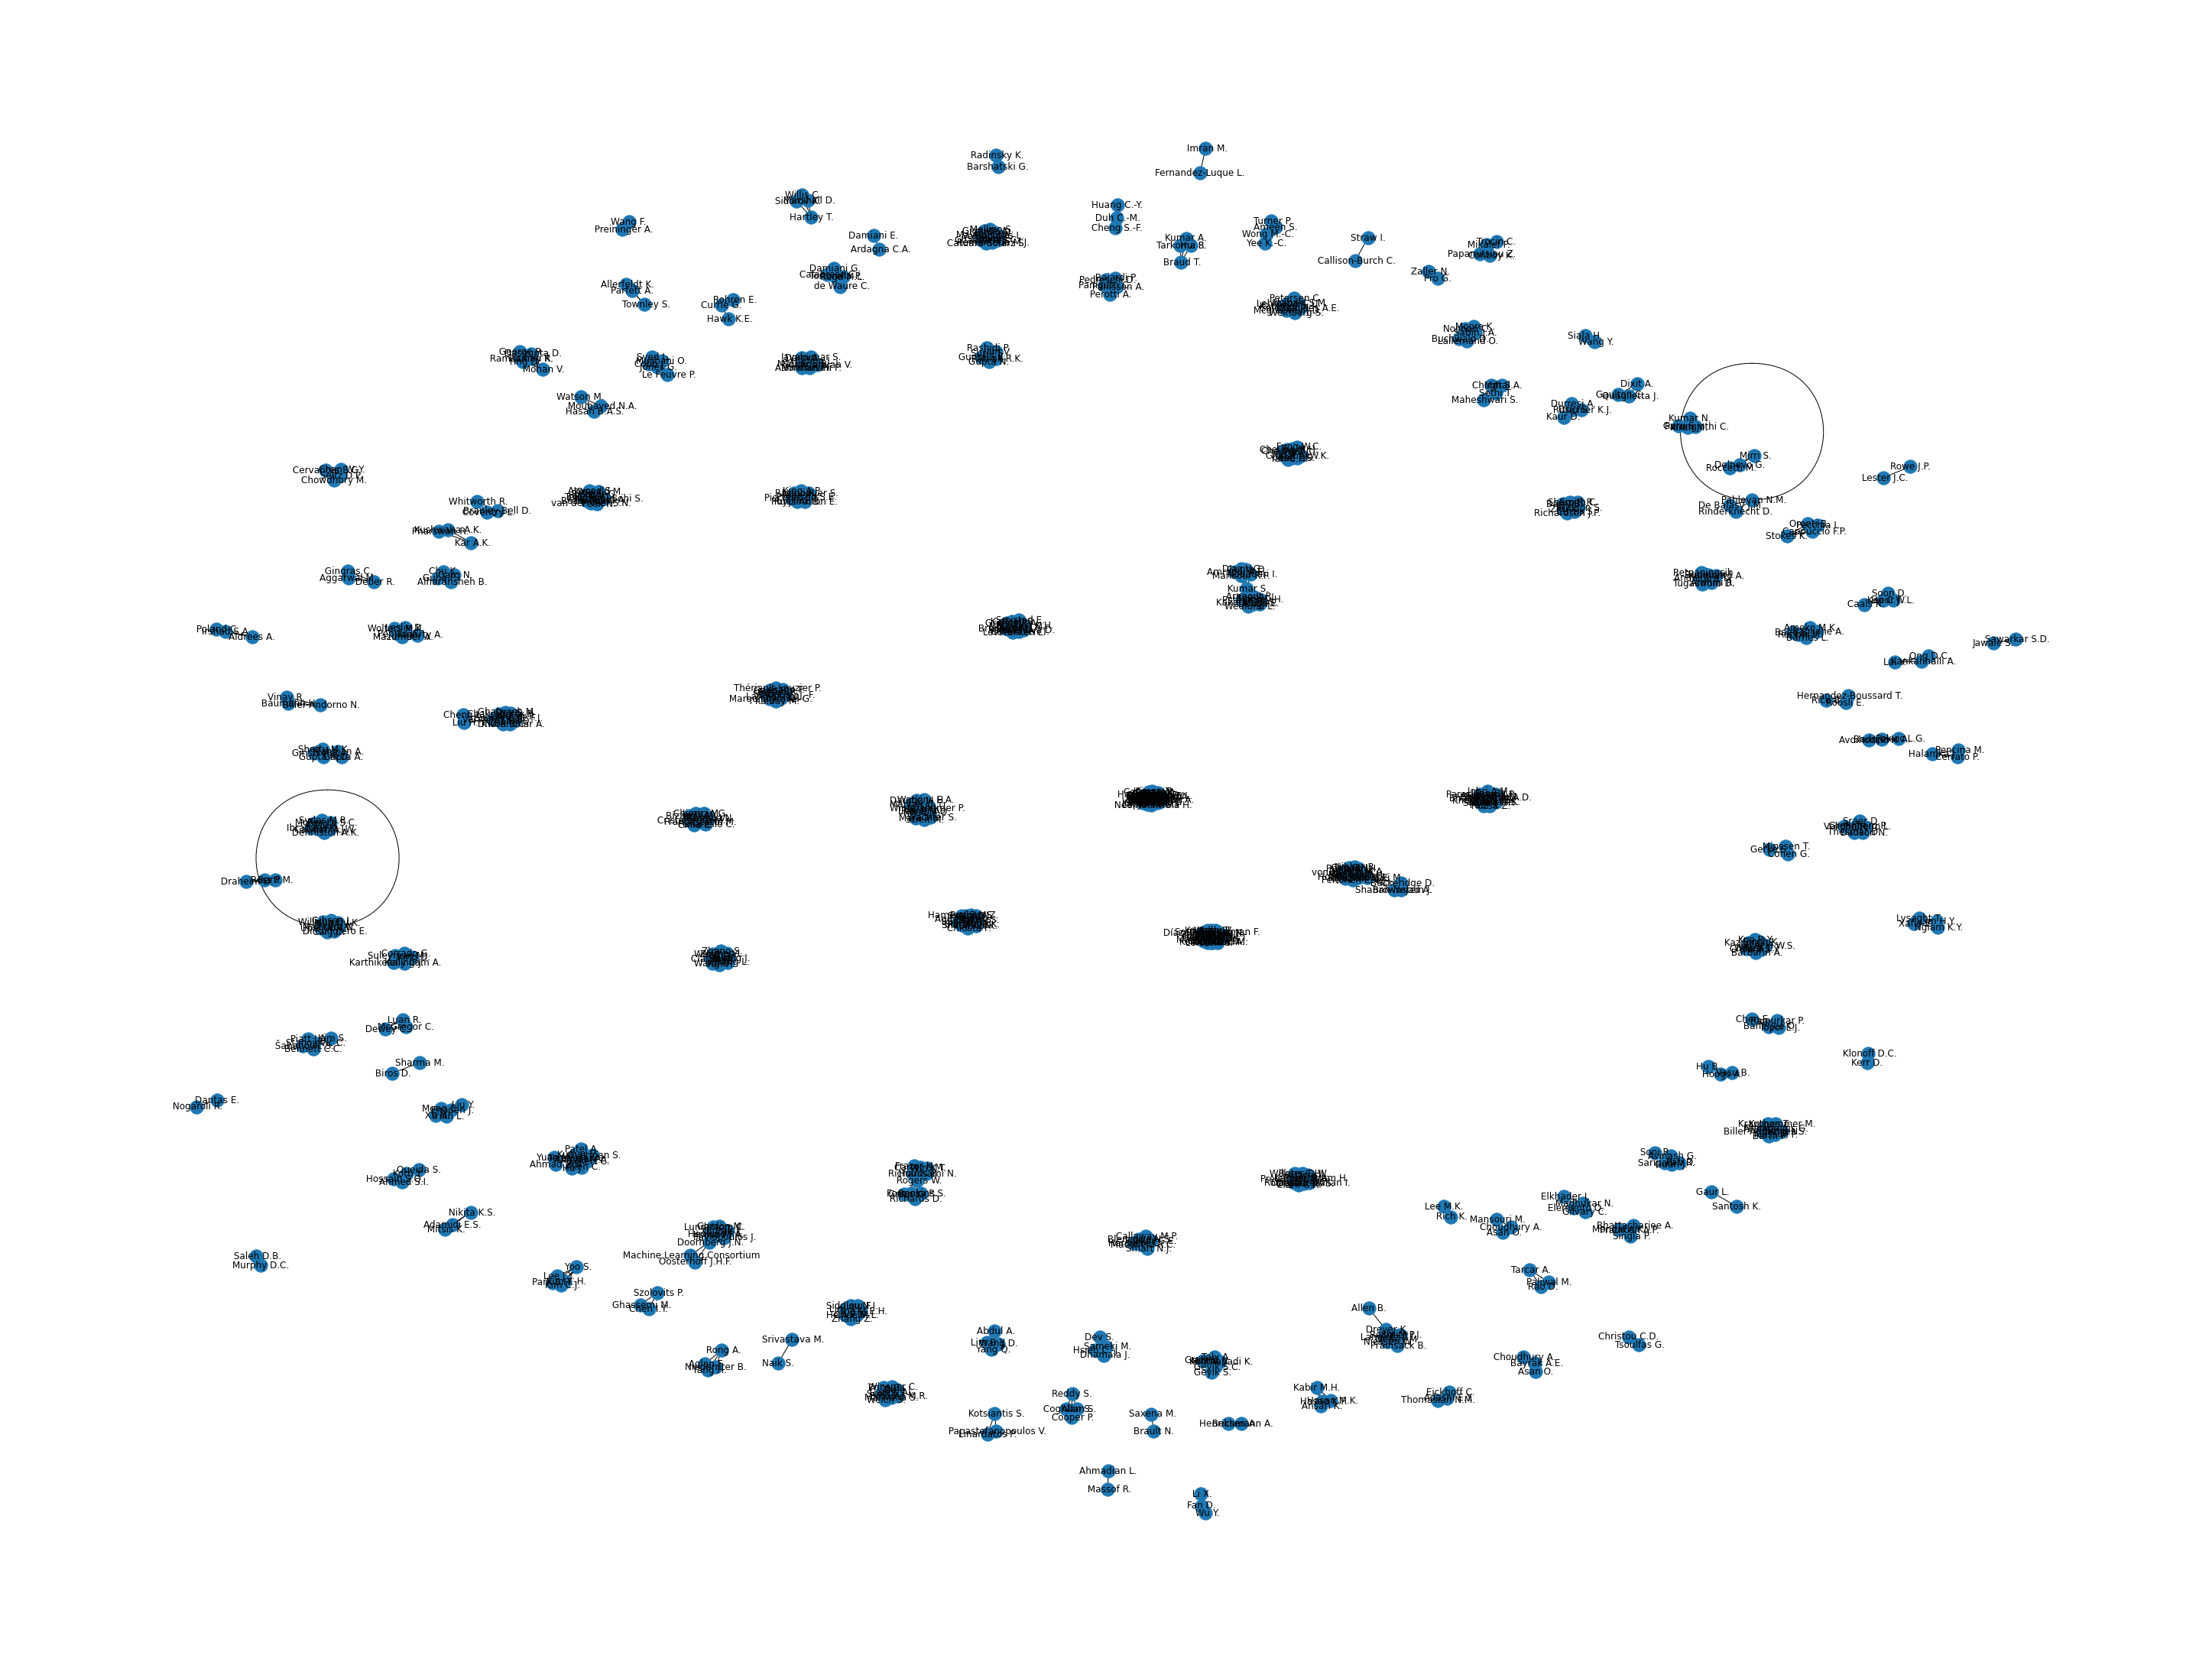

In [20]:
# create graph
plt.figure(figsize = (40, 30))

G = nx.from_pandas_edgelist(df, 'author_0', 'author_1')
nx.draw(G, with_labels=True)

In [21]:
# why the loops?

df.loc[df['author_0'] == df['author_1']]

,Authors,count,author_0,author_1
950,"( Malhotra N., Malhotra N.)",1,Malhotra N.,Malhotra N.
1204,"( Pahlevan N.M., Pahlevan N.M.)",3,Pahlevan N.M.,Pahlevan N.M.


In [22]:
# get rid of these self-loops
df = df[df['author_0'] != df['author_1']]

In [23]:
df.shape
df_scopus1 = df[['author_0', 'author_1', 'count']]
df_scopus1.to_csv('scopus_main.csv')


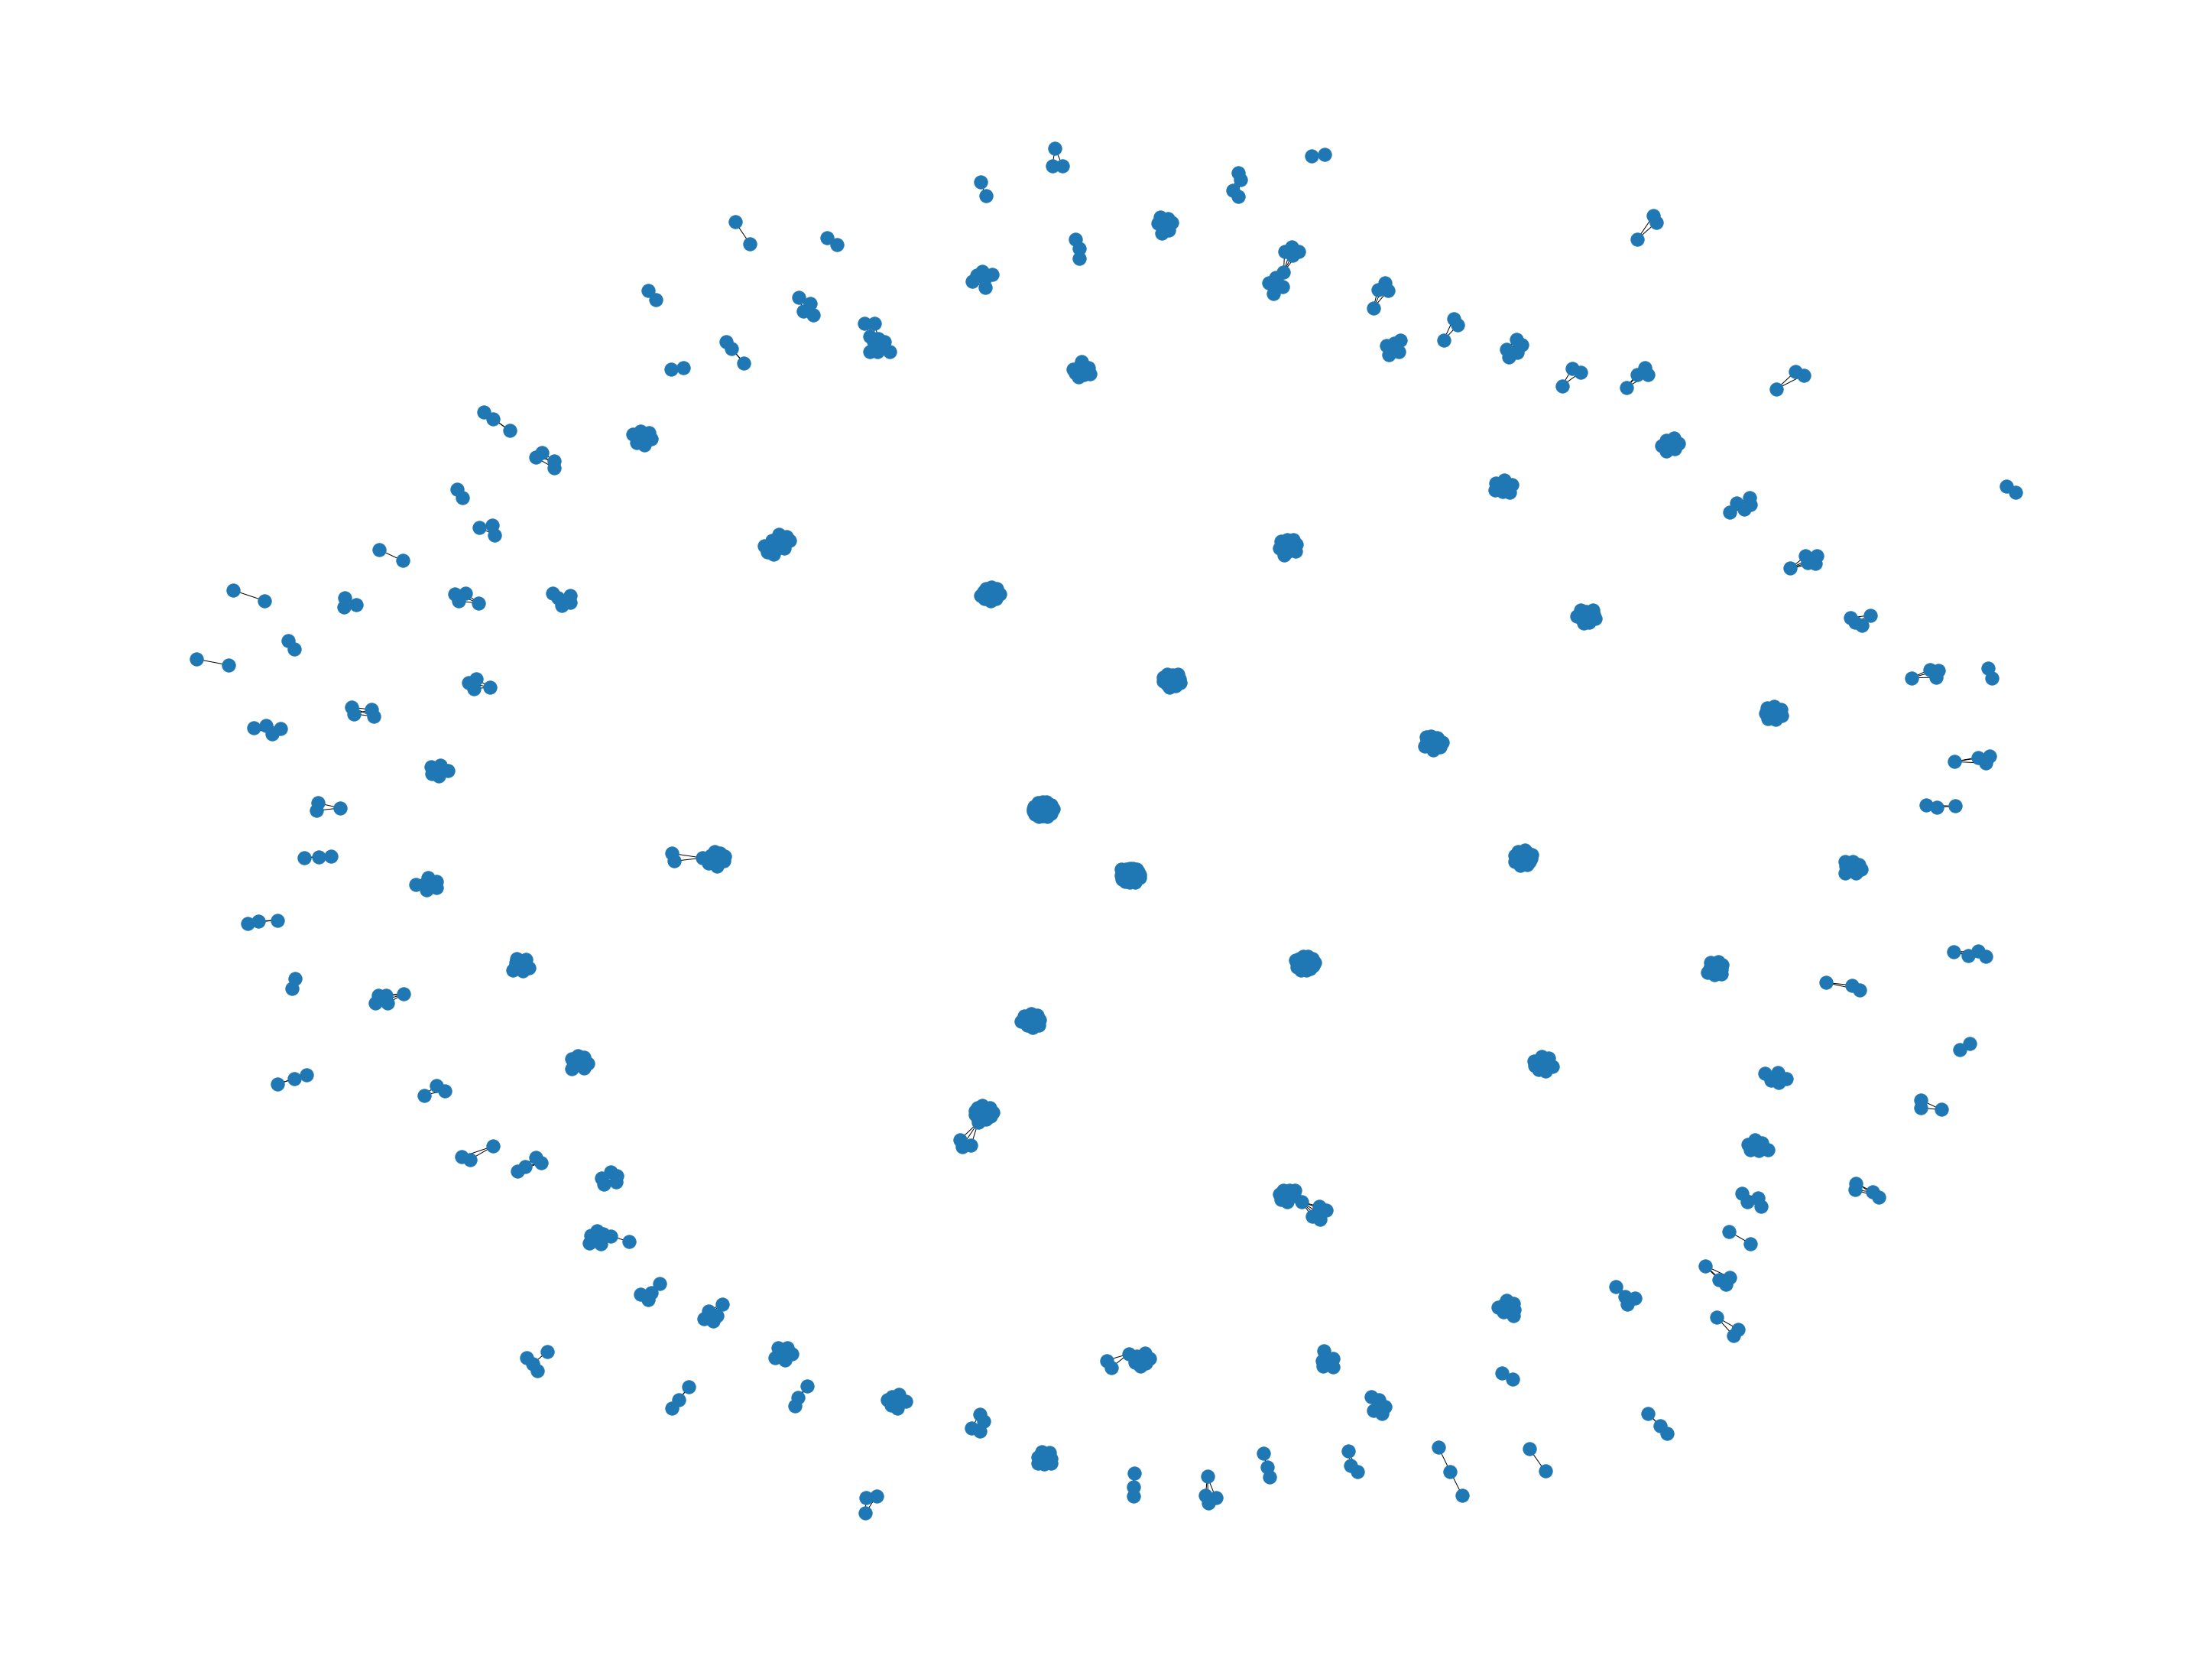

In [149]:
# recreate graph
plt.figure(figsize = (40, 30))

G = nx.from_pandas_edgelist(df, 'author_0', 'author_1', edge_attr=True)
nx.draw(G, with_labels=True)

In [25]:
print('Number of components in {}: {}'.format(G, nx.number_connected_components(G)))

Number of components in Graph with 637 nodes and 2300 edges: 117


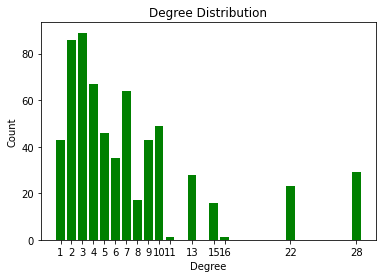

In [71]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
degreeCount = Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
plt.bar(deg, cnt, width=0.80, color='g')
plt.title("Degree Distribution")
plt.ylabel("Count")
plt.xticks(deg)
plt.xlabel("Degree")
plt.show()

In [27]:
#function to return first n items of dict as a list
def take(n, iterable):
    return list(islice(iterable, n))


In [28]:
# degree centrality
dc_sorted_tuples = sorted(nx.degree_centrality(G).items(), key=lambda item: item[1], reverse=True)
dc_sorted_dict = {k: v for k, v in dc_sorted_tuples}

# show top 5
take(5, dc_sorted_dict.items())

[(' Andrews B.', 0.04402515723270441),
 (' Andrusaite A.', 0.04402515723270441),
 (' Garcia P.', 0.04402515723270441),
 (' Hawkes D.', 0.04402515723270441),
 (' Kelly J.D.', 0.04402515723270441)]

In [29]:
# show top 40
take(40, dc_sorted_dict.items())

[(' Andrews B.', 0.04402515723270441),
 (' Andrusaite A.', 0.04402515723270441),
 (' Garcia P.', 0.04402515723270441),
 (' Hawkes D.', 0.04402515723270441),
 (' Kelly J.D.', 0.04402515723270441),
 (' Kimpe T.', 0.04402515723270441),
 (' Neemuchwala H.', 0.04402515723270441),
 (' Stoyanov D.', 0.04402515723270441),
 (' Arezzo A.', 0.04402515723270441),
 (' Beaulieu Y.', 0.04402515723270441),
 (' Elson D.', 0.04402515723270441),
 (' Giannarou S.', 0.04402515723270441),
 (' Hares L.', 0.04402515723270441),
 (' Jannin P.', 0.04402515723270441),
 (' Jarc A.', 0.04402515723270441),
 (' Laplante G.', 0.04402515723270441),
 (' Levy J.', 0.04402515723270441),
 (' Maier-Hein L.', 0.04402515723270441),
 (' Marz K.', 0.04402515723270441),
 (' Mori K.', 0.04402515723270441),
 (' Ramadorai A.', 0.04402515723270441),
 (' Slack M.', 0.04402515723270441),
 (' Valdastri P.', 0.04402515723270441),
 (' Ghazi A.', 0.04402515723270441),
 (' Hager G.', 0.04402515723270441),
 (' Hashimoto D.', 0.0440251572327

In [30]:
# closeness centrality
cc_sorted_tuples = sorted(nx.closeness_centrality(G).items(), key=lambda item: item[1], reverse=True)
cc_sorted_dict = {k: v for k, v in cc_sorted_tuples}

# show top 5
take(5, cc_sorted_dict.items())

[(' Andrews B.', 0.0440251572327044),
 (' Andrusaite A.', 0.0440251572327044),
 (' Garcia P.', 0.0440251572327044),
 (' Hawkes D.', 0.0440251572327044),
 (' Kelly J.D.', 0.0440251572327044)]

In [31]:
# show top 40
take(40, cc_sorted_dict.items())

[(' Andrews B.', 0.0440251572327044),
 (' Andrusaite A.', 0.0440251572327044),
 (' Garcia P.', 0.0440251572327044),
 (' Hawkes D.', 0.0440251572327044),
 (' Kelly J.D.', 0.0440251572327044),
 (' Kimpe T.', 0.0440251572327044),
 (' Neemuchwala H.', 0.0440251572327044),
 (' Stoyanov D.', 0.0440251572327044),
 (' Arezzo A.', 0.0440251572327044),
 (' Beaulieu Y.', 0.0440251572327044),
 (' Elson D.', 0.0440251572327044),
 (' Giannarou S.', 0.0440251572327044),
 (' Hares L.', 0.0440251572327044),
 (' Jannin P.', 0.0440251572327044),
 (' Jarc A.', 0.0440251572327044),
 (' Laplante G.', 0.0440251572327044),
 (' Levy J.', 0.0440251572327044),
 (' Maier-Hein L.', 0.0440251572327044),
 (' Marz K.', 0.0440251572327044),
 (' Mori K.', 0.0440251572327044),
 (' Ramadorai A.', 0.0440251572327044),
 (' Slack M.', 0.0440251572327044),
 (' Valdastri P.', 0.0440251572327044),
 (' Ghazi A.', 0.0440251572327044),
 (' Hager G.', 0.0440251572327044),
 (' Hashimoto D.', 0.0440251572327044),
 (' Sridhar A.', 0.

In [32]:
# betweenness centrality
bc_sorted_tuples = sorted(nx.betweenness_centrality(G).items(), key=lambda item: item[1], reverse=True)
bc_sorted_dict = {k: v for k, v in bc_sorted_tuples}

# show top 5
take(5, bc_sorted_dict.items())

[(' Kumar S.', 0.0001980884464913584),
 (' Michalowski M.', 0.00019313623532907443),
 (' Rogers W.', 9.90442232456792e-05),
 (' Varshney K.R.', 8.913980092111127e-05),
 (' Doornberg J.N.', 6.933095627197544e-05)]

In [33]:
# show top 5
take(40, bc_sorted_dict.items())

[(' Kumar S.', 0.0001980884464913584),
 (' Michalowski M.', 0.00019313623532907443),
 (' Rogers W.', 9.90442232456792e-05),
 (' Varshney K.R.', 8.913980092111127e-05),
 (' Doornberg J.N.', 6.933095627197544e-05),
 (' Teredesai A.', 3.441786757787352e-05),
 (' Kumar V.', 3.441786757787352e-05),
 (' Dreyer K.', 2.9713266973703756e-05),
 (' Riedl M.O.', 8.913980092111128e-06),
 (' Riener A.', 8.913980092111128e-06),
 (' Liao Q.V.', 8.913980092111128e-06),
 (' Wintersberger P.', 8.913980092111128e-06),
 ('Ehsan U.', 8.913980092111128e-06),
 ('Currie G.', 4.9522111622839596e-06),
 (' Eckert C.', 4.704600604169761e-06),
 ('Ahmad M.A.', 4.704600604169761e-06),
 (' Kenthapadi K.', 1.2380527905709899e-06),
 (' Mithal V.', 1.2380527905709899e-06),
 (' Taly A.', 1.2380527905709899e-06),
 ('Gade K.', 1.2380527905709899e-06),
 (' Allen C.', 9.90442232456792e-07),
 (' Abdul A.', 0.0),
 (' Lim B.Y.', 0.0),
 (' Aggarwal K.', 0.0),
 (' Brahim S.', 0.0),
 (' Chlosta P.', 0.0),
 (' Patil V.', 0.0),
 (' R

In [34]:
# have node size depend on node degree
dict(G.degree()).values()

dict_values([3, 3, 13, 13, 13, 13, 13, 13, 13, 13, 3, 9, 3, 3, 3, 3, 3, 3, 6, 7, 5, 9, 4, 4, 5, 5, 5, 13, 5, 5, 5, 5, 5, 28, 28, 28, 28, 28, 28, 28, 28, 3, 3, 7, 7, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 8, 8, 8, 8, 8, 8, 2, 2, 6, 6, 7, 7, 7, 7, 7, 7, 10, 10, 10, 10, 10, 2, 2, 4, 4, 4, 4, 4, 3, 3, 4, 4, 7, 7, 7, 7, 7, 7, 6, 6, 7, 9, 9, 2, 2, 2, 2, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 3, 3, 3, 13, 13, 13, 13, 16, 13, 13, 13, 13, 13, 13, 13, 10, 3, 3, 3, 3, 3, 10, 10, 10, 10, 10, 8, 8, 8, 8, 8, 8, 8, 8, 3, 3, 7, 7, 7, 7, 7, 7, 7, 7, 4, 4, 4, 4, 5, 5, 5, 7, 7, 3, 3, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 3, 3, 3, 9, 9, 9, 9, 9, 9, 9, 9, 11, 7, 7, 9, 9, 9, 9, 9, 9, 9, 9, 9, 3, 10, 10, 10, 10, 10, 10, 4, 4, 4, 4, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 7, 10, 10, 2, 2, 9, 9, 9, 2, 2, 6, 7, 6, 6, 6, 6, 3, 3, 7, 7, 7, 9, 7, 7, 7, 2, 2, 2, 2, 2, 3, 3, 4, 4, 8, 7, 7, 7, 7, 5

In [35]:
#have edge thickness depend on count of collaborations
edgelist = nx.to_edgelist(G)


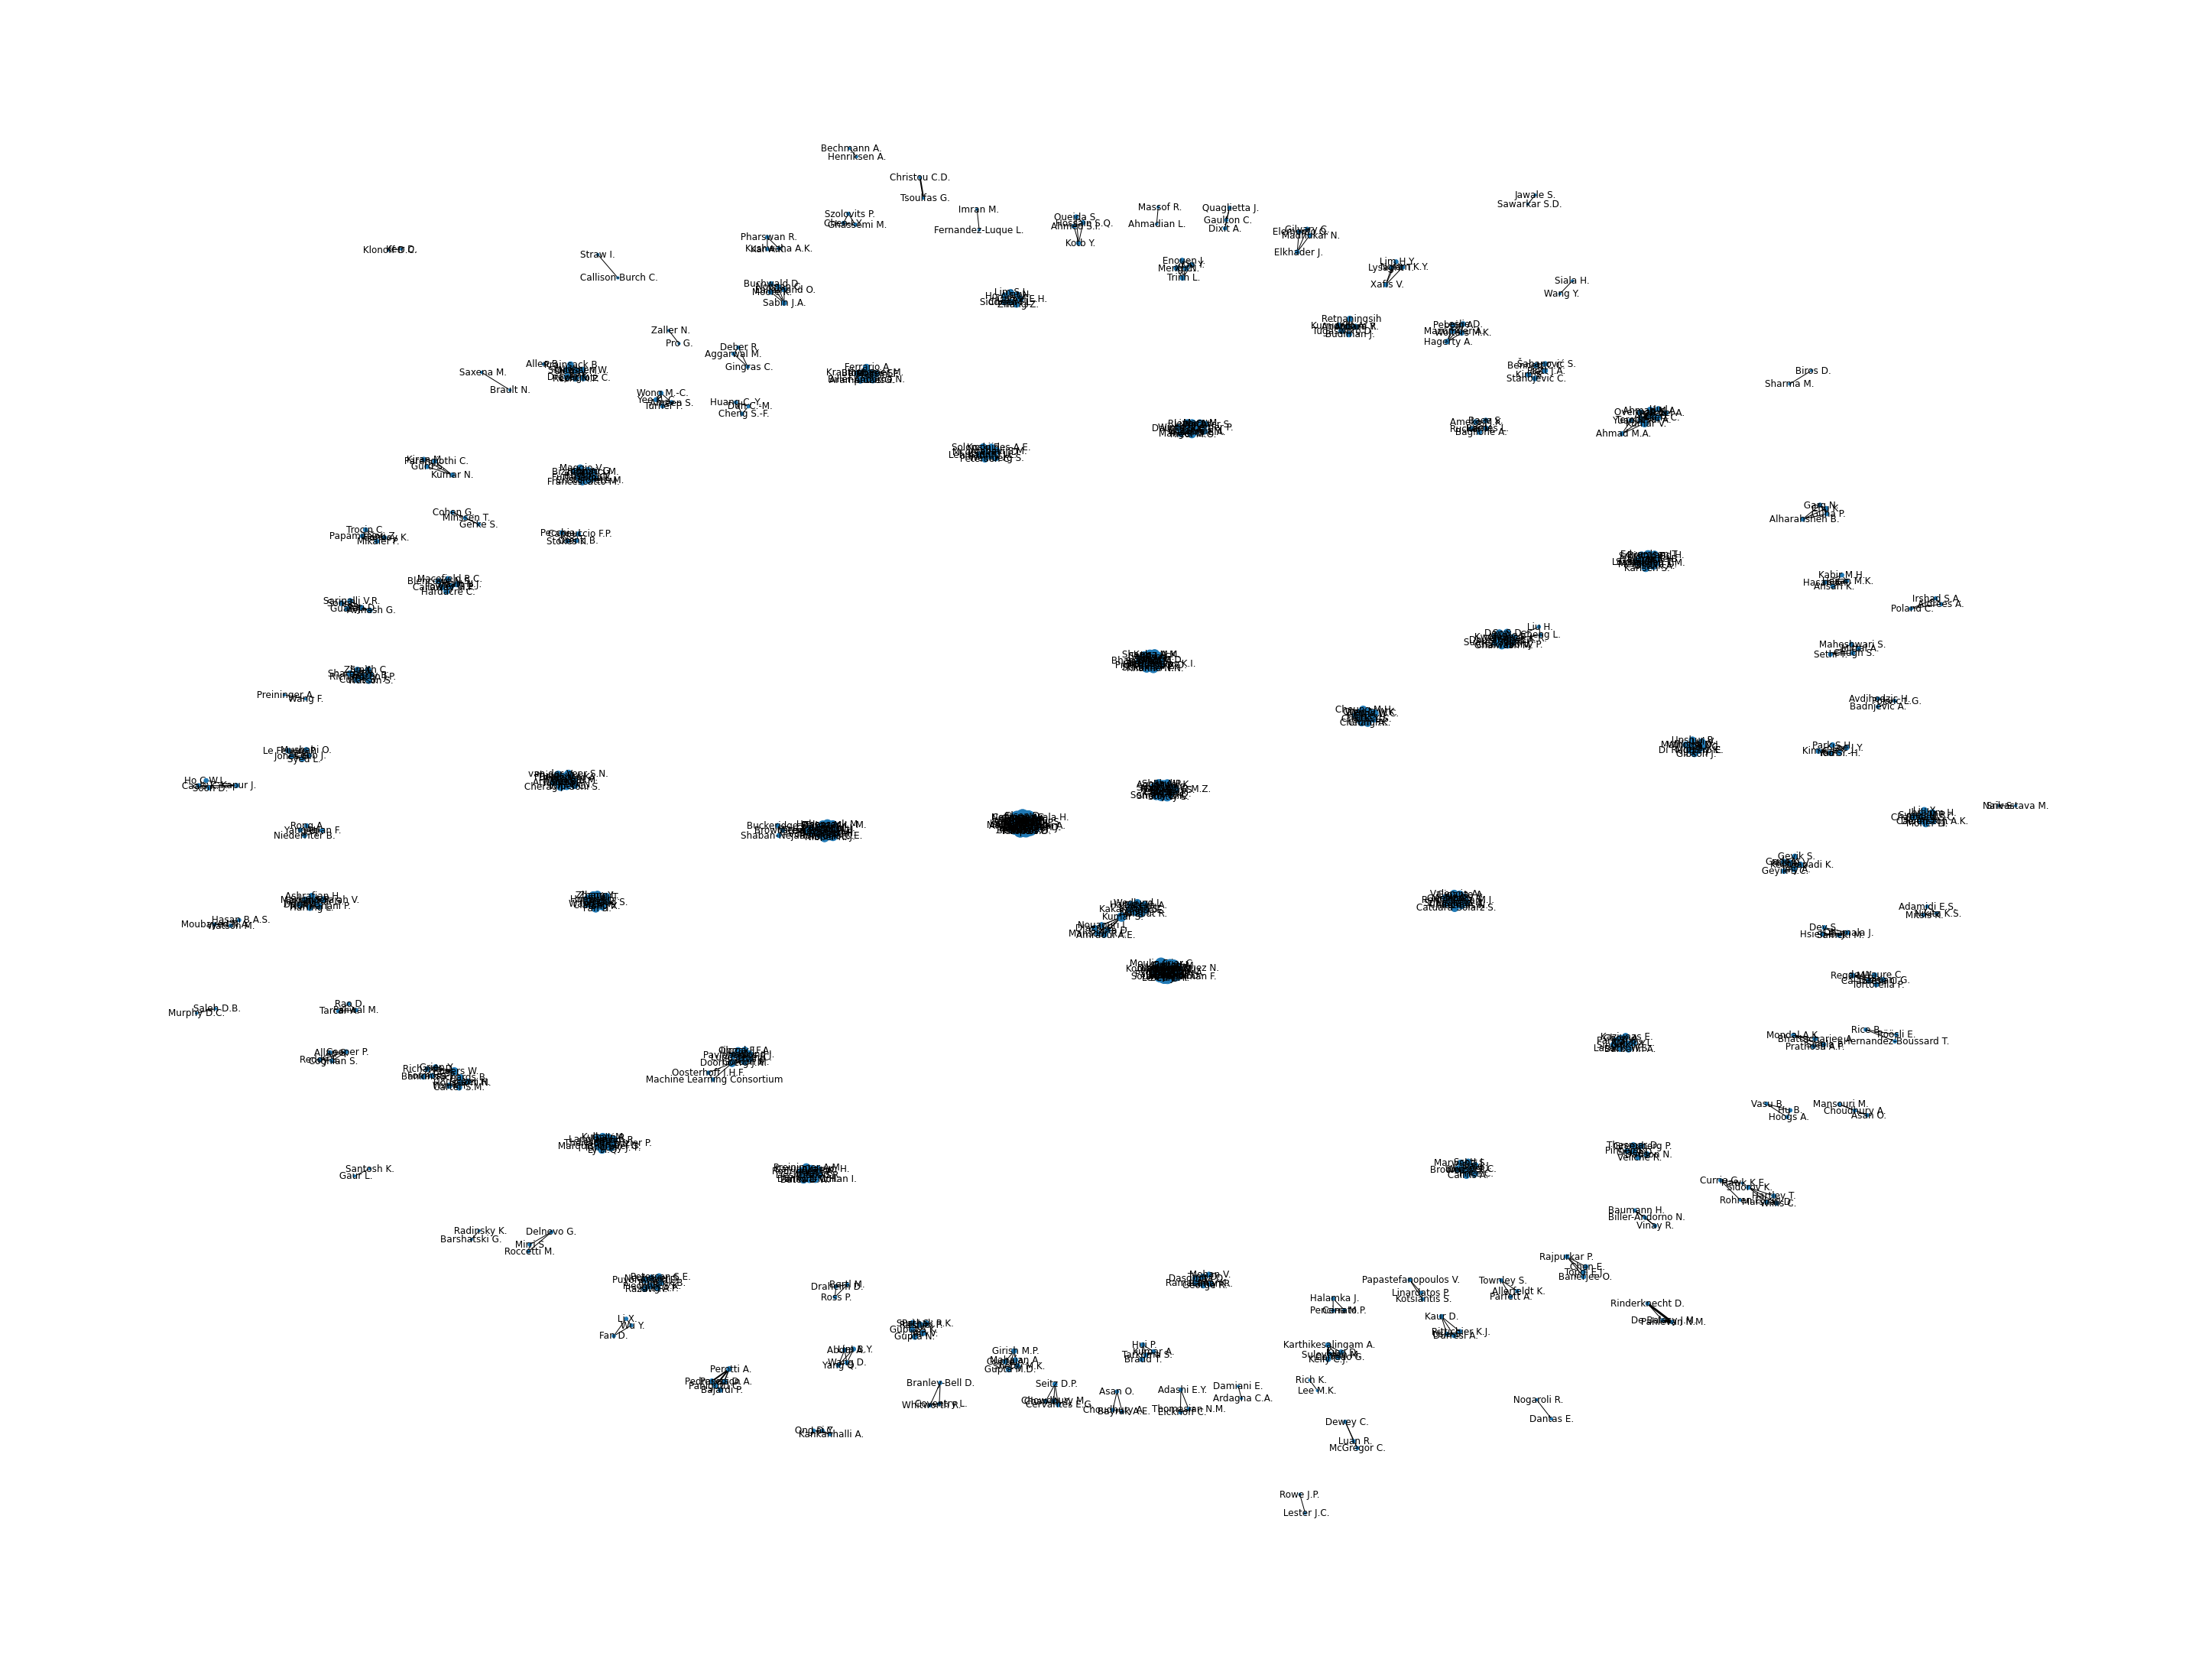

In [36]:
# recreate graph with attributes added
plt.figure(figsize = (40, 30))

G = nx.from_pandas_edgelist(df, 'author_0', 'author_1', edge_attr=True)
nx.draw(G, 
        with_labels=True, 
        node_size = [d*10 for d in dict(G.degree()).values()],
       width = [v[2]['count'] for v in edgelist])

In [37]:
G = nx.from_pandas_edgelist(df, 'author_0', 'author_1')
nx.write_gexf(G, 'scopus_main.gexf', encoding='utf-8', prettyprint=True, version='1.2draft')

In [38]:
G

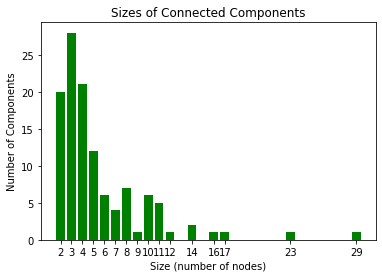

In [151]:
size_sequence = sorted([len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)])
sizeCount = Counter(size_sequence)
deg, cnt = zip(*sizeCount.items())

plt.bar(deg, cnt, color='g')
plt.title("Sizes of Connected Components")
plt.ylabel("Number of Components")
plt.xticks(deg)
plt.xlabel("Size (number of nodes)")
plt.show()

In [40]:
largest_cc = max(nx.connected_components(G), key=len)

In [41]:
largest_cc

{' Andrews B.',
 ' Andrusaite A.',
 ' Arezzo A.',
 ' Beaulieu Y.',
 ' Elson D.',
 ' Garcia P.',
 ' Ghazi A.',
 ' Giannarou S.',
 ' Hager G.',
 ' Hares L.',
 ' Hashimoto D.',
 ' Hawkes D.',
 ' Jannin P.',
 ' Jarc A.',
 ' Kelly J.D.',
 ' Kimpe T.',
 ' Laplante G.',
 ' Levy J.',
 ' Maier-Hein L.',
 ' Marcus H.J.',
 ' Marz K.',
 ' Mori K.',
 ' Neemuchwala H.',
 ' Ramadorai A.',
 ' Slack M.',
 ' Sridhar A.',
 ' Stoyanov D.',
 ' Valdastri P.',
 'Collins J.W.'}

In [42]:
cluster_coeffs = nx.clustering(G, nodes=None, weight='count')

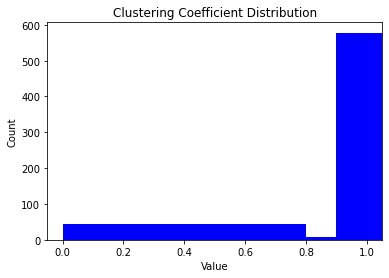

In [43]:
plt.hist(cluster_coeffs.values(), width=0.80, color='g')
plt.title("Clustering Coefficient")
plt.ylabel("Count")
plt.xlabel("Value")
plt.show()

In [44]:
pagerank = nx.pagerank(G, alpha=0.85, weight='count')

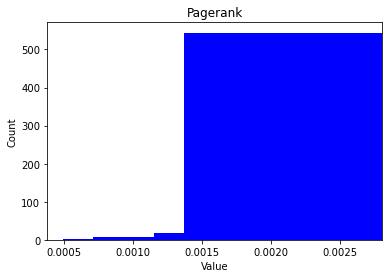

In [45]:
plt.hist(pagerank.values(),  width=0.80, color='g')
plt.title("Pagerank")
plt.ylabel("Count")
plt.xlabel("Value")
plt.show()

In [46]:
data.groupby('Year').size().sort_values(ascending=False)

Year
2021    57
2020    33
2022    29
2019    20
2018     4
2008     1
2015     1
2017     1
2023     1
dtype: int64

In [147]:
by_years = data.groupby('Year').size().sort_values(ascending=False).to_frame(name='count').reset_index()
by_years.sort_values('Year')

,Year,count
5,2008,1
6,2015,1
7,2017,1
4,2018,4
3,2019,20
1,2020,33
0,2021,57
2,2022,29
8,2023,1


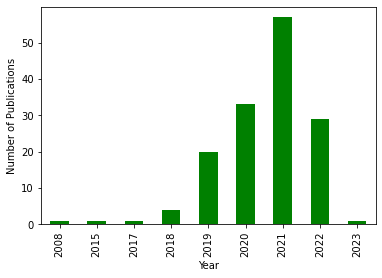

In [148]:
by_years.sort_values('Year').plot.bar(x='Year', color='g')
plt.ylabel("Number of Publications")
plt.xlabel("Year")
plt.gca().get_legend().remove()
plt.show()

In [47]:
# break analysis down by year
data_2018 = data[data['Year'] == 2018]
data_2019 = data[data['Year'] == 2019]
data_2020 = data[data['Year'] == 2020]
data_2021 = data[data['Year'] == 2021]
data_2022 = data[data['Year'] == 2022]

In [48]:
years = [data_2018, data_2019, data_2020, data_2021, data_2022]
for yr in years:
    print(yr.shape)

(4, 33)
(20, 33)
(33, 33)
(57, 33)
(29, 33)


In [49]:
# preprocess with same steps as above

# create pairs

#------------------
data_2018['author_id_mapping'] = data_2018.apply(lambda z: cmp(z['author_list'], z['author_id_list']), axis=1)
paired_2018 = (data_2018.set_index('Title')['Authors']
   .str.split(',')
   .map(partial(combinations, r=2))
   .map(list)
   .explode()
   .reset_index())

df_2018 = paired_2018.groupby('Authors').size().to_frame(name = 'count').reset_index()
new_col_list = ['author_0','author_1']
for n,col in enumerate(new_col_list):
    df_2018[col] = df_2018['Authors'].apply(lambda location: location[n])
    
#------------------
data_2019['author_id_mapping'] = data_2019.apply(lambda z: cmp(z['author_list'], z['author_id_list']), axis=1)
paired_2019 = (data_2019.set_index('Title')['Authors']
   .str.split(',')
   .map(partial(combinations, r=2))
   .map(list)
   .explode()
   .reset_index())

df_2019 = paired_2019.groupby('Authors').size().to_frame(name = 'count').reset_index()
new_col_list = ['author_0','author_1']
for n,col in enumerate(new_col_list):
    df_2019[col] = df_2019['Authors'].apply(lambda location: location[n])

#-----------------
data_2020['author_id_mapping'] = data_2020.apply(lambda z: cmp(z['author_list'], z['author_id_list']), axis=1)
paired_2020 = (data_2020.set_index('Title')['Authors']
   .str.split(',')
   .map(partial(combinations, r=2))
   .map(list)
   .explode()
   .reset_index())

df_2020 = paired_2020.groupby('Authors').size().to_frame(name = 'count').reset_index()
new_col_list = ['author_0','author_1']
for n,col in enumerate(new_col_list):
    df_2020[col] = df_2020['Authors'].apply(lambda location: location[n])

    
#-----------------
data_2021['author_id_mapping'] = data_2021.apply(lambda z: cmp(z['author_list'], z['author_id_list']), axis=1)
paired_2021 = (data_2021.set_index('Title')['Authors']
   .str.split(',')
   .map(partial(combinations, r=2))
   .map(list)
   .explode()
   .reset_index())

df_2021 = paired_2021.groupby('Authors').size().to_frame(name = 'count').reset_index()
new_col_list = ['author_0','author_1']
for n,col in enumerate(new_col_list):
    df_2021[col] = df_2021['Authors'].apply(lambda location: location[n])
    
#-----------------
data_2022['author_id_mapping'] = data_2022.apply(lambda z: cmp(z['author_list'], z['author_id_list']), axis=1)
paired_2022 = (data_2022.set_index('Title')['Authors']
   .str.split(',')
   .map(partial(combinations, r=2))
   .map(list)
   .explode()
   .reset_index())

df_2022 = paired_2022.groupby('Authors').size().to_frame(name = 'count').reset_index()
new_col_list = ['author_0','author_1']
for n,col in enumerate(new_col_list):
    df_2022[col] = df_2022['Authors'].apply(lambda location: location[n])

In [50]:
years = [df_2018, df_2019, df_2020, df_2021, df_2022]
for yr in years:
    print(yr.shape)

(39, 4)
(158, 4)
(469, 4)
(1037, 4)
(611, 4)


In [51]:
# remove self pairs in any of the dfs
df_2018 = df_2018[df_2018['author_0'] != df_2018['author_1']]
df_2019 = df_2019[df_2019['author_0'] != df_2019['author_1']]
df_2020 = df_2020[df_2020['author_0'] != df_2020['author_1']]
df_2021 = df_2021[df_2021['author_0'] != df_2021['author_1']]
df_2022 = df_2022[df_2022['author_0'] != df_2022['author_1']]


In [52]:
for yr in years:
    print(yr.shape)

(39, 4)
(158, 4)
(469, 4)
(1037, 4)
(611, 4)


In [53]:
# create graphs
G_2018 = nx.from_pandas_edgelist(df_2018, 'author_0', 'author_1')
G_2019 = nx.from_pandas_edgelist(df_2019, 'author_0', 'author_1')
G_2020 = nx.from_pandas_edgelist(df_2020, 'author_0', 'author_1')
G_2021 = nx.from_pandas_edgelist(df_2021, 'author_0', 'author_1')
G_2022 = nx.from_pandas_edgelist(df_2022, 'author_0', 'author_1')




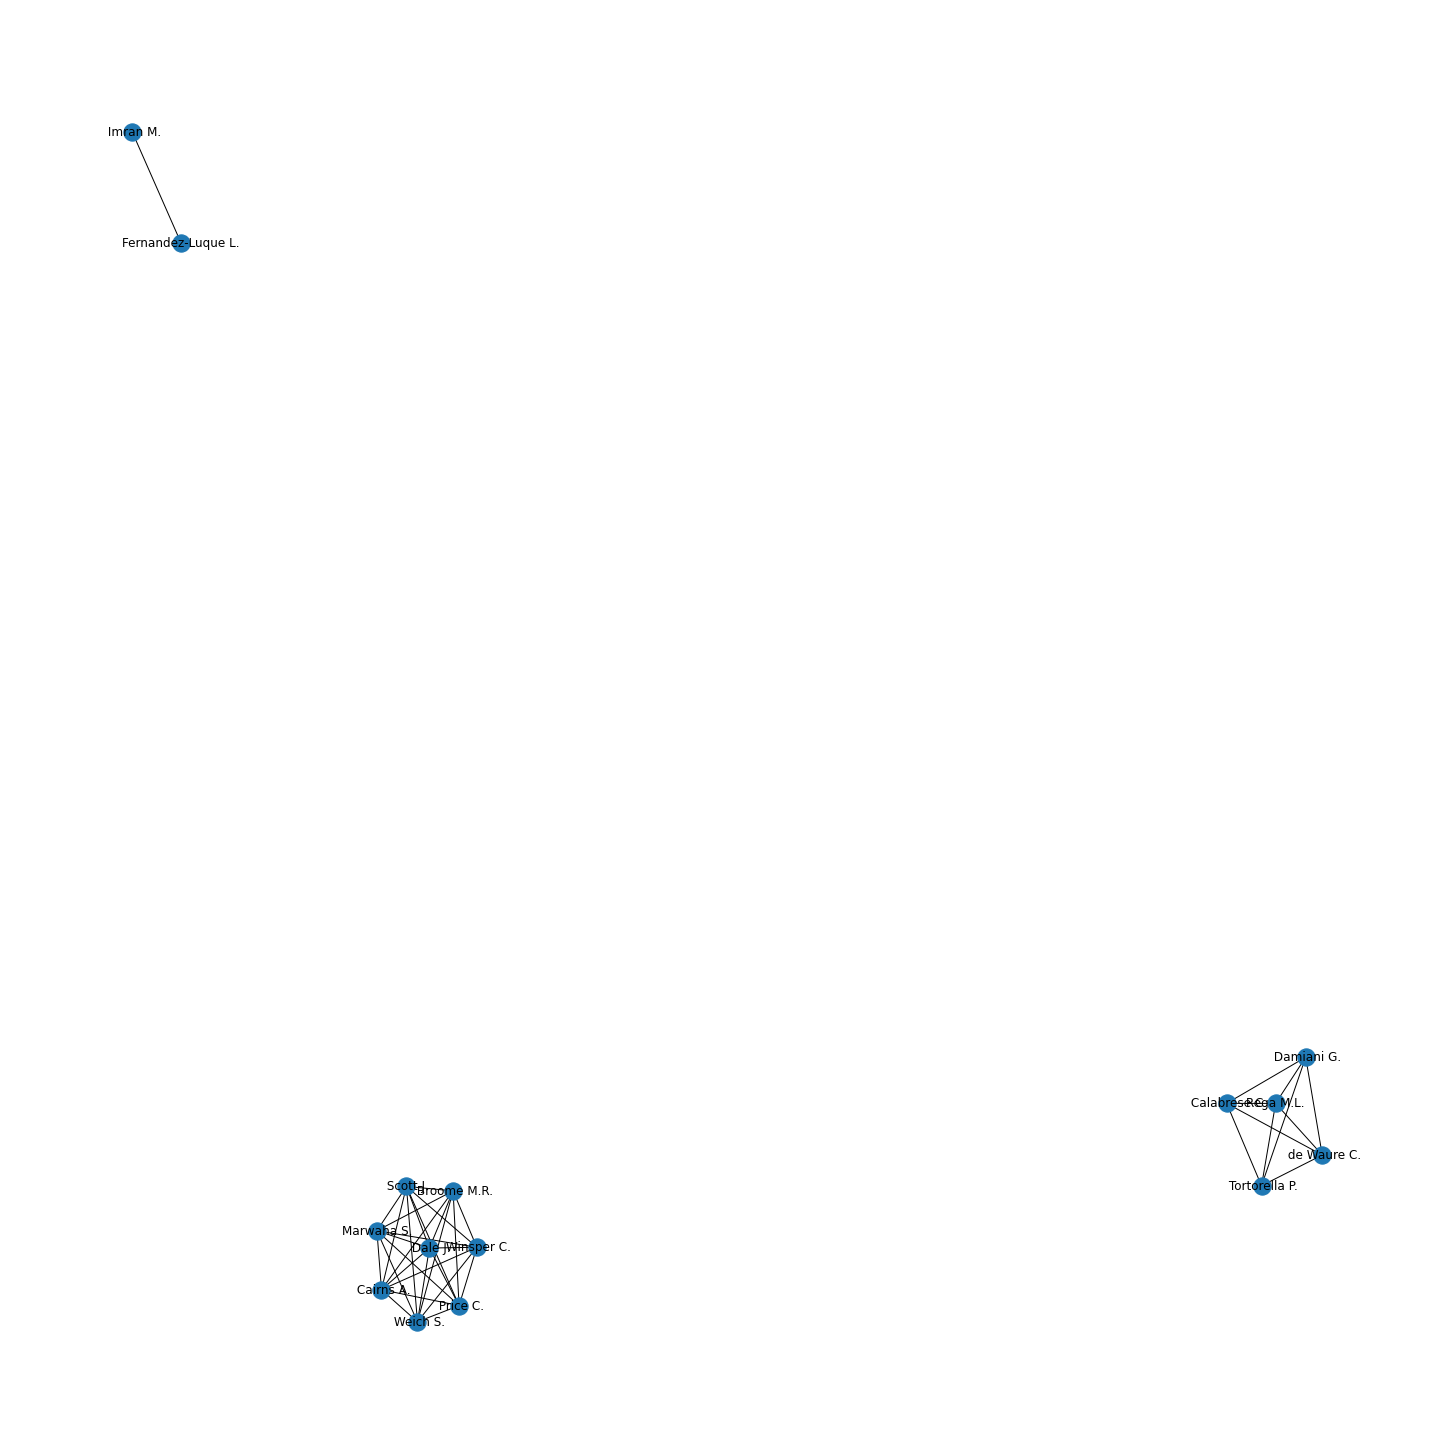

In [54]:
plt.figure(figsize = (20, 20))
nx.draw(G_2018, with_labels=True)

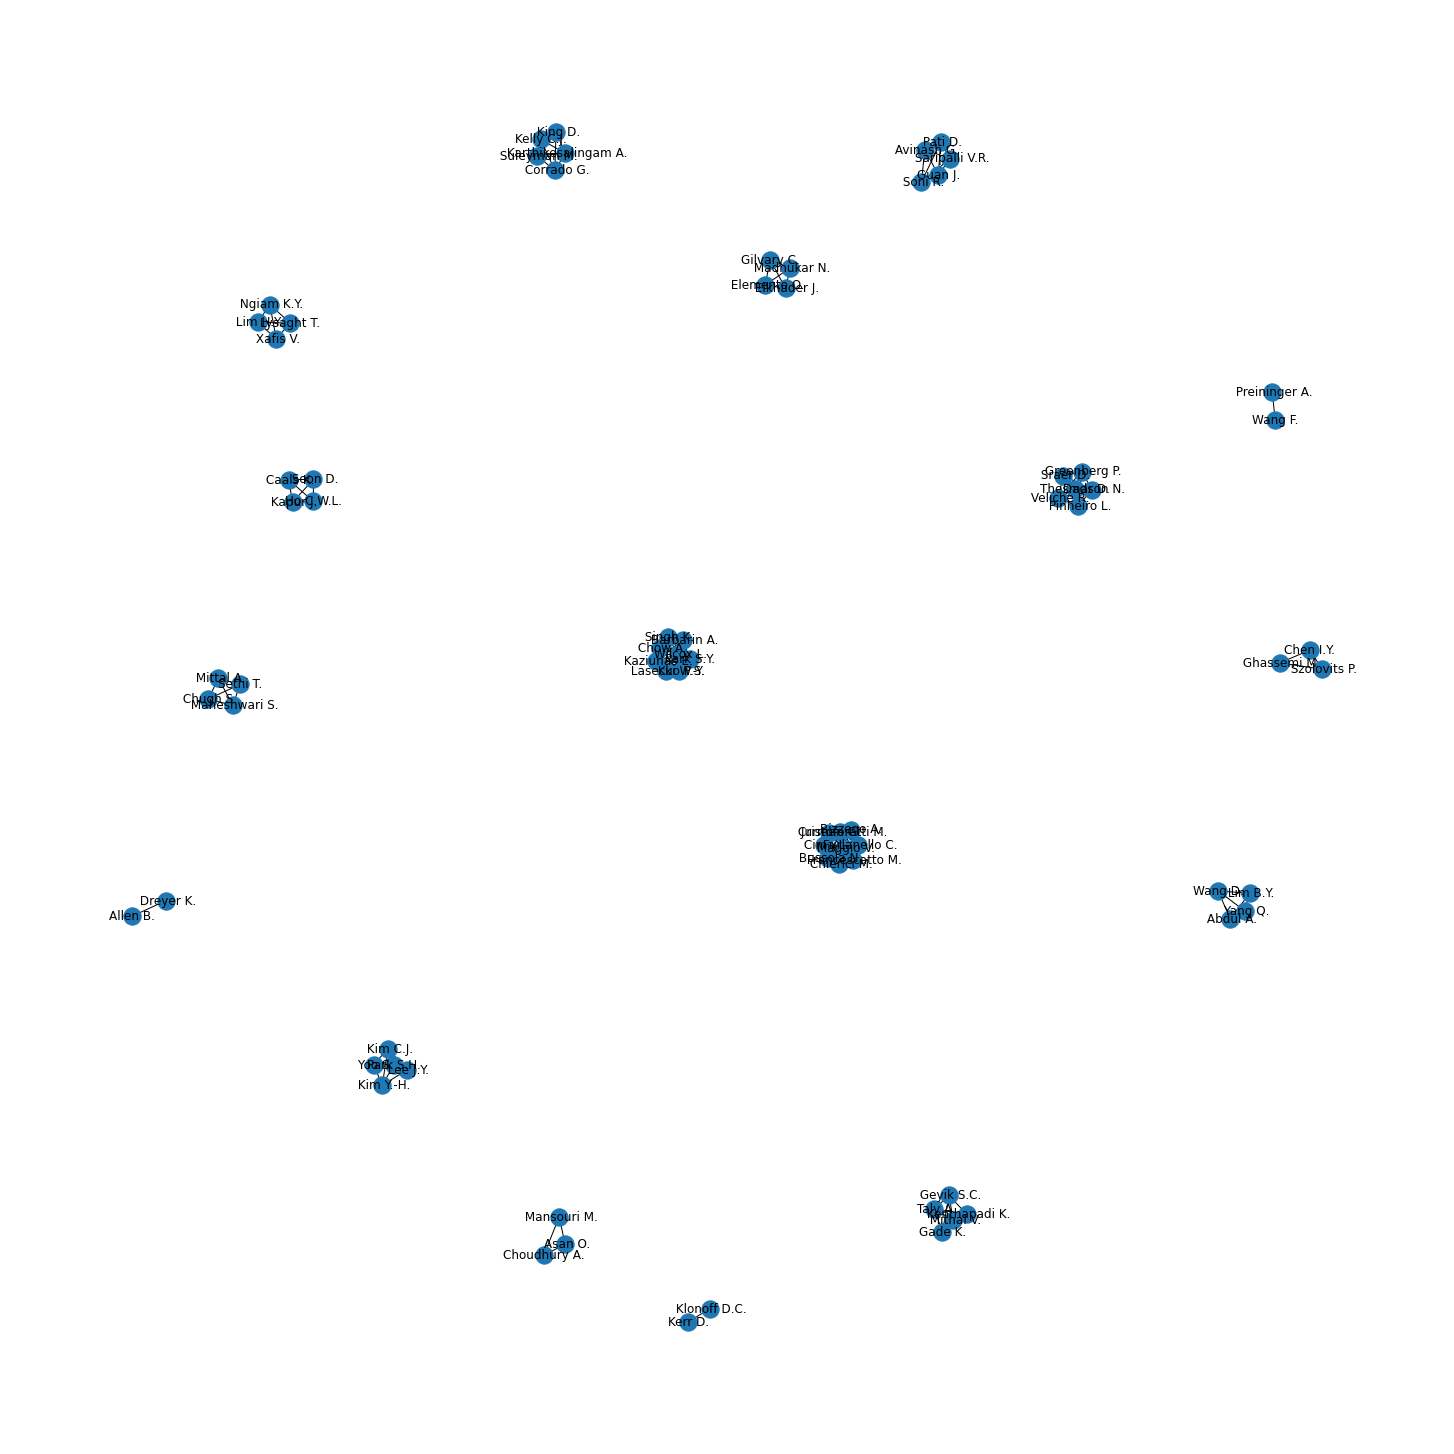

In [55]:
plt.figure(figsize = (20, 20))
nx.draw(G_2019, with_labels=True)

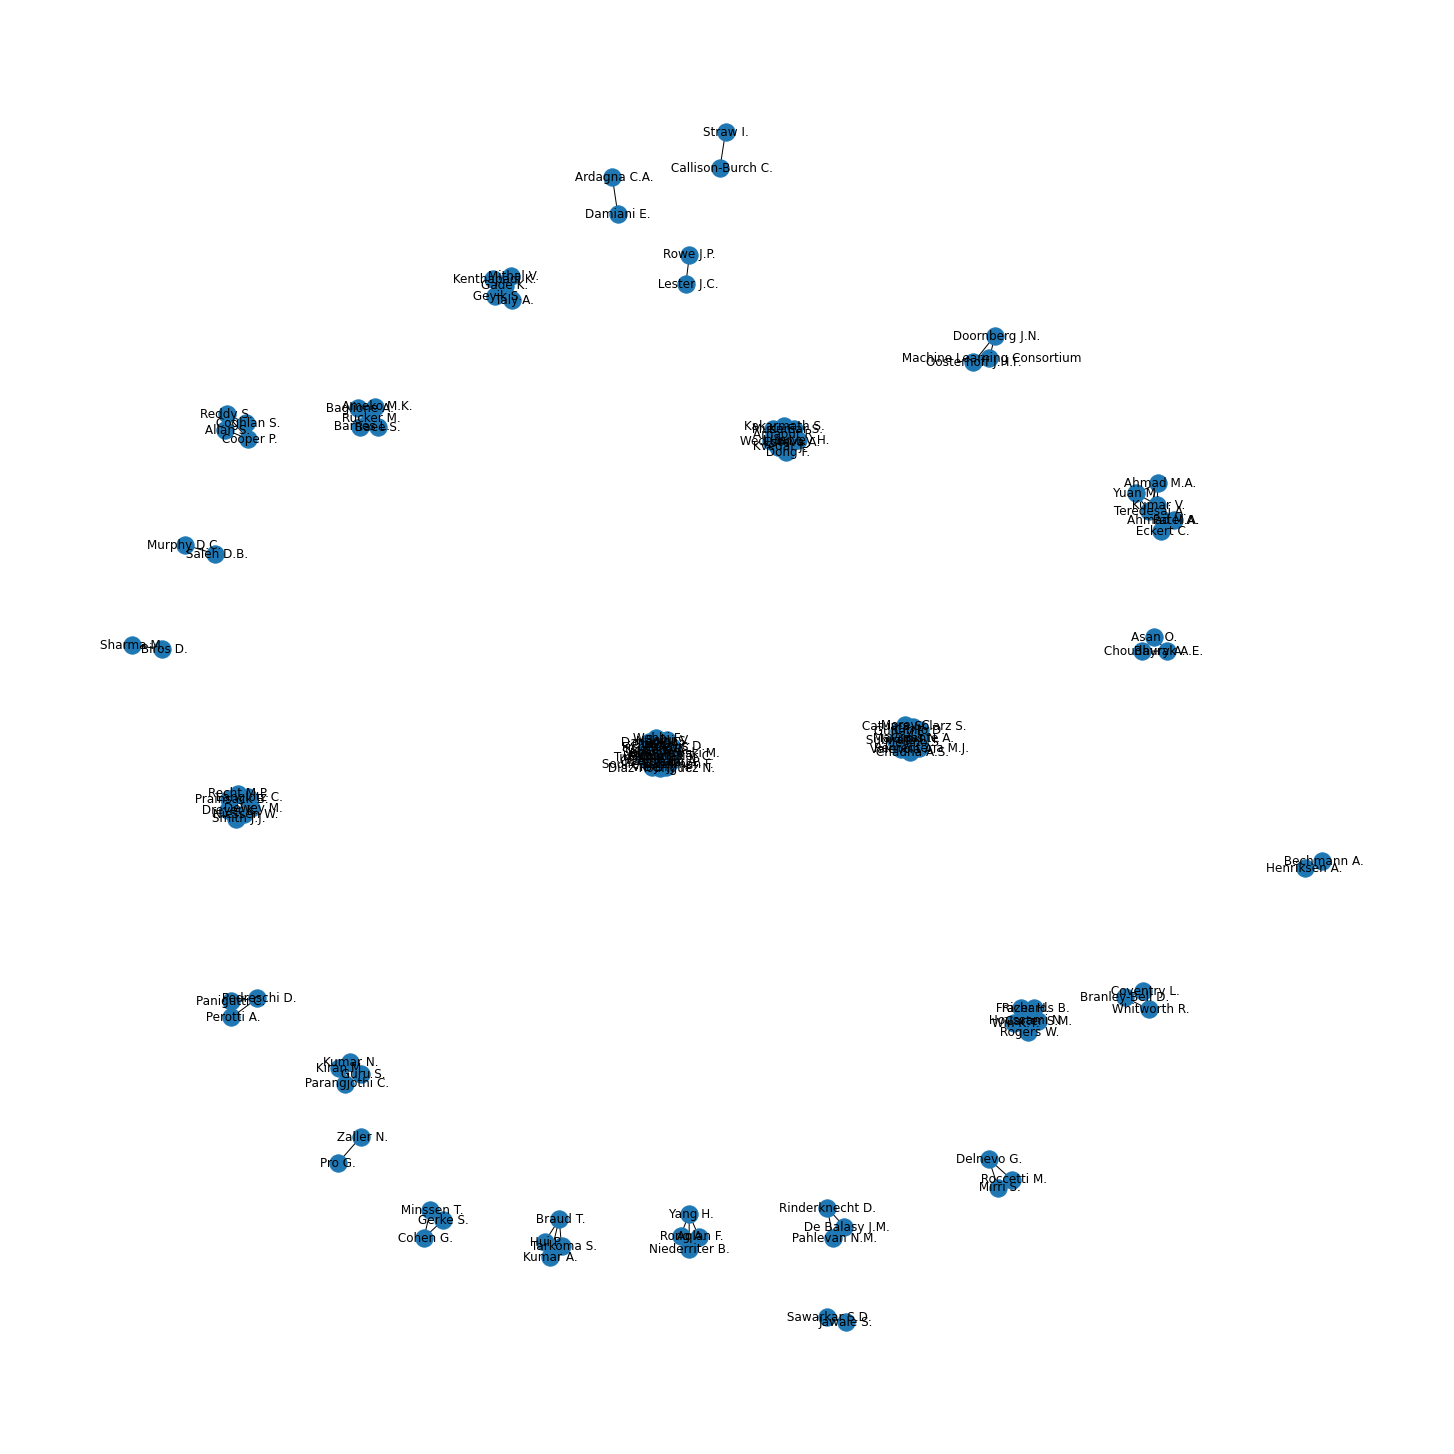

In [56]:
plt.figure(figsize = (20, 20))
nx.draw(G_2020, with_labels=True)

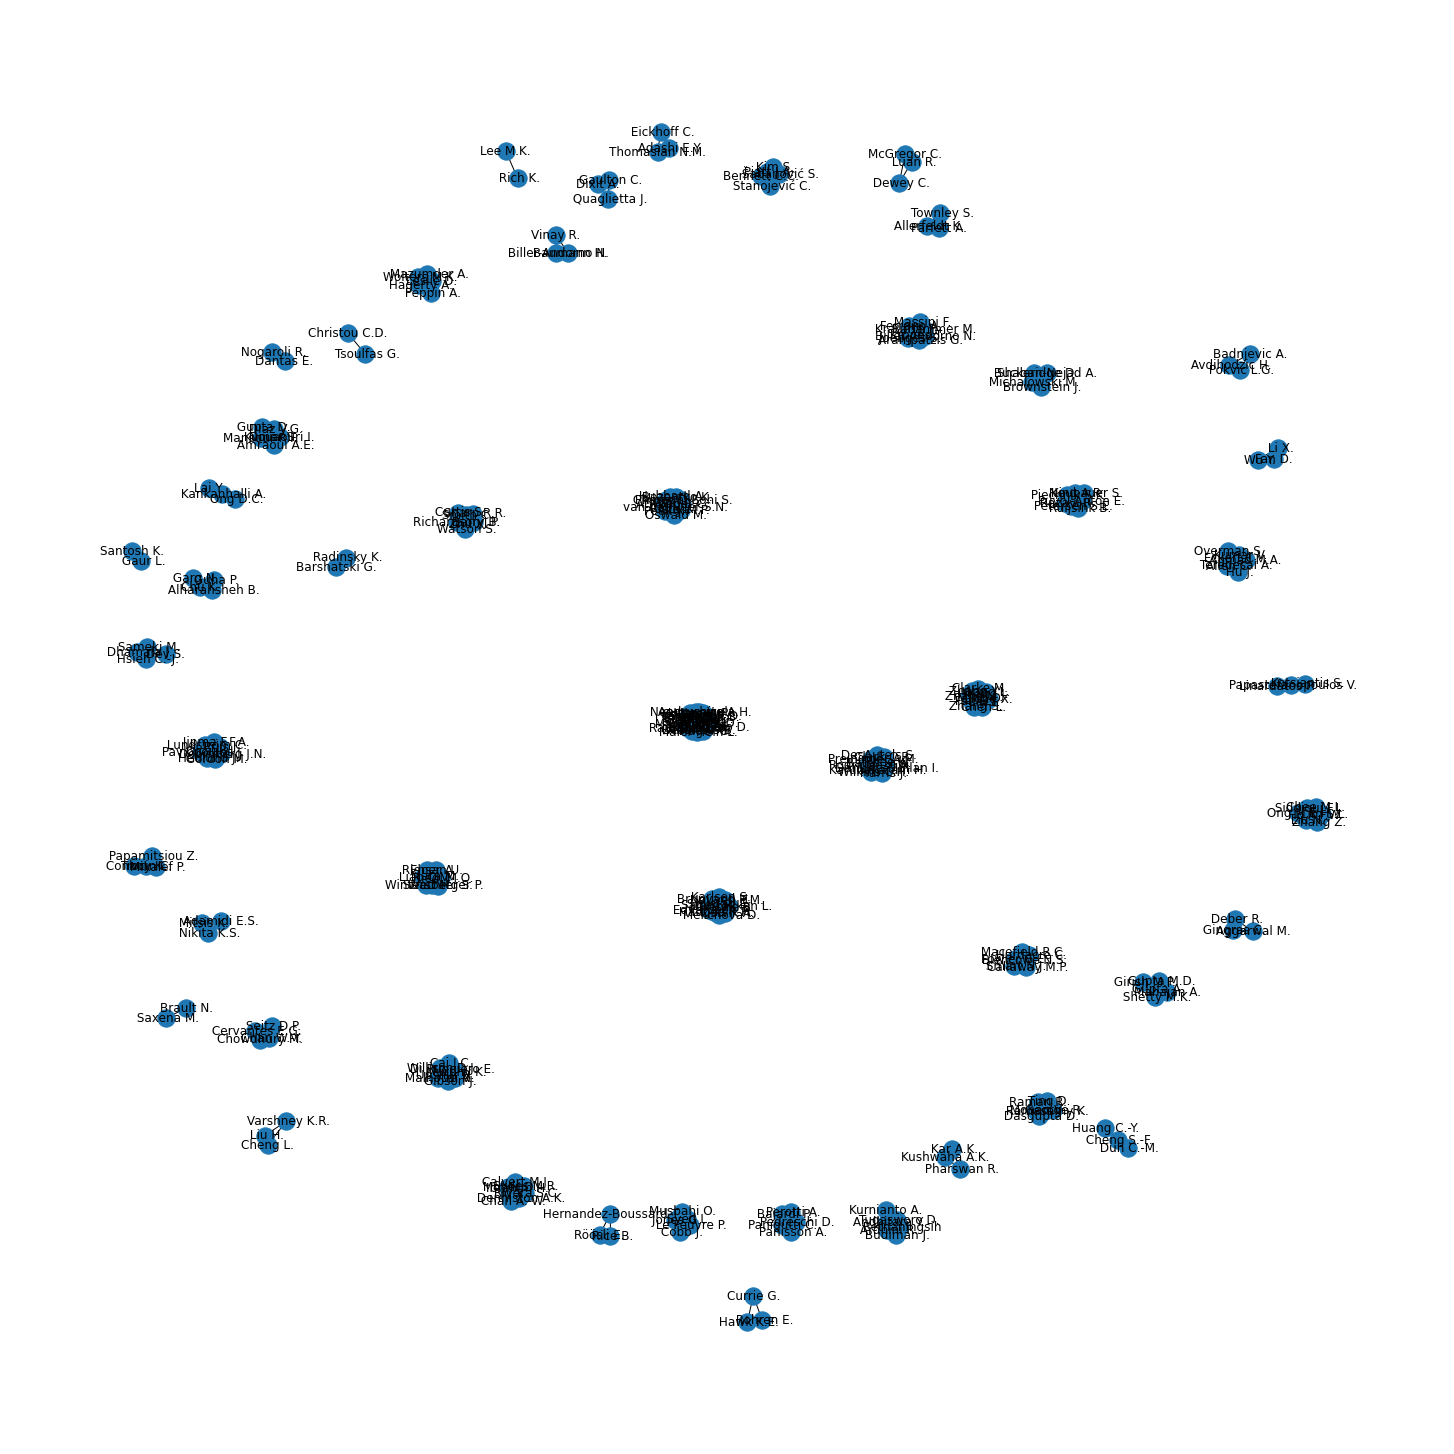

In [57]:
plt.figure(figsize = (20, 20))
nx.draw(G_2021, with_labels=True)

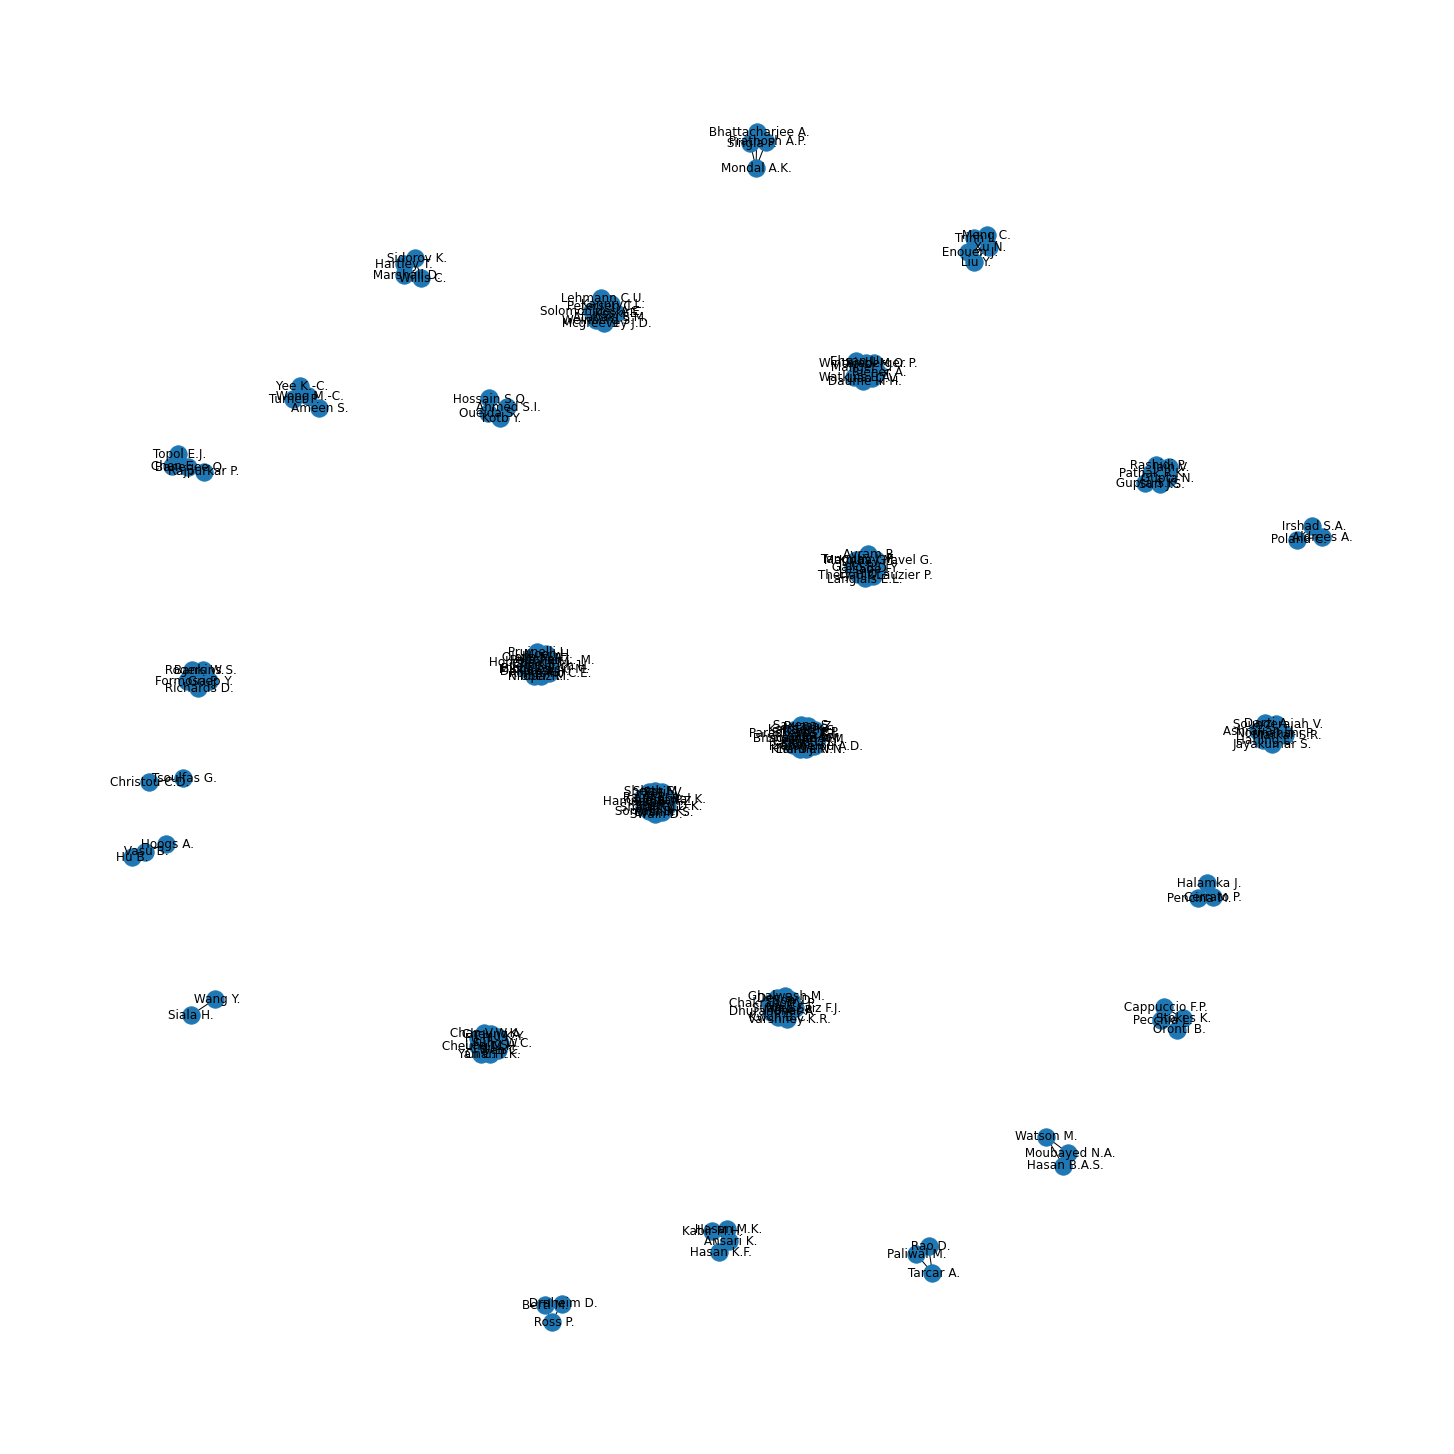

In [58]:
plt.figure(figsize = (20, 20))
nx.draw(G_2022, with_labels=True)

In [59]:
graphs = [G_2018, G_2019, G_2020, G_2021, G_2022]
for graph in graphs:
    print('Number of components in {}: {}'.format(graph, nx.number_connected_components(graph)))

Number of components in Graph with 15 nodes and 39 edges: 3
Number of components in Graph with 75 nodes and 158 edges: 17
Number of components in Graph with 126 nodes and 468 edges: 27
Number of components in Graph with 269 nodes and 1032 edges: 50
Number of components in Graph with 163 nodes and 611 edges: 27


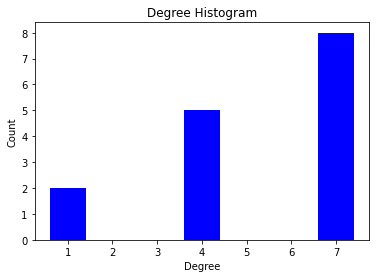

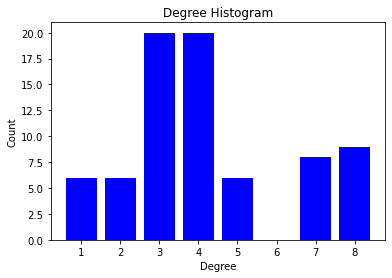

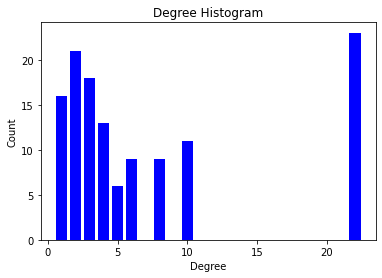

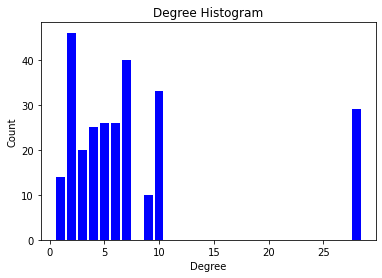

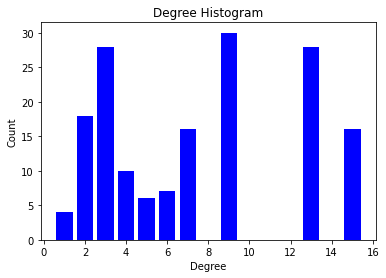

In [60]:
for g in graphs:
    degree_sequence = sorted([d for n, d in g.degree()], reverse=True)
    degreeCount = Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())
    plt.bar(deg, cnt, width=0.80, color='g')
    plt.title("Degree Distribution")
    plt.ylabel("Count")
    plt.xlabel("Degree")
    plt.show()

In [72]:
nx.find_cliques(G)

<generator object find_cliques at 0x000002B8B3C5BB30>

In [73]:
nx.enumerate_all_cliques(G)

<generator object enumerate_all_cliques at 0x000002B8B49934A0>

In [82]:
# clique counts per actor
cliques_count = nx.number_of_cliques(G)

cl_sorted_tuples = sorted(cliques_count.items(), key=lambda item: item[1], reverse=True)
cl_sorted_dict = {k: v for k, v in cl_sorted_tuples}

# show top 
take(30, cl_sorted_dict.items())

[(' Teredesai A.', 4),
 (' Kumar V.', 4),
 (' Eckert C.', 3),
 ('Ahmad M.A.', 3),
 (' Allen C.', 2),
 (' Kumar S.', 2),
 (' Michalowski M.', 2),
 (' Varshney K.R.', 2),
 (' Riedl M.O.', 2),
 (' Riener A.', 2),
 (' Dreyer K.', 2),
 (' Doornberg J.N.', 2),
 (' Kenthapadi K.', 2),
 (' Mithal V.', 2),
 (' Taly A.', 2),
 (' Liao Q.V.', 2),
 (' Rogers W.', 2),
 (' Wintersberger P.', 2),
 ('Currie G.', 2),
 ('Ehsan U.', 2),
 ('Gade K.', 2),
 (' Abdul A.', 1),
 (' Lim B.Y.', 1),
 (' Aggarwal K.', 1),
 (' Brahim S.', 1),
 (' Chlosta P.', 1),
 (' Patil V.', 1),
 (' Rai B.P.', 1),
 (' Shetty S.', 1),
 (' Smriti K.', 1)]

In [83]:
nx.cliques_containing_node(G, nodes=' Teredesai A.')

[[' Overman S.',
  ' Allen C.',
  'Ahmad M.A.',
  ' Teredesai A.',
  ' Eckert C.',
  ' Kumar V.'],
 [' Allen C.',
  ' Hu J.',
  'Ahmad M.A.',
  ' Teredesai A.',
  ' Eckert C.',
  ' Kumar V.'],
 ['Yuan M.', ' Ahmad M.A.', ' Teredesai A.', ' Kumar V.'],
 [' Teredesai A.', ' Patel A.', 'Ahmad M.A.', ' Eckert C.', ' Kumar V.']]

In [85]:
nx.cliques_containing_node(G, nodes=' Kumar V.')

[[' Overman S.',
  ' Allen C.',
  'Ahmad M.A.',
  ' Teredesai A.',
  ' Eckert C.',
  ' Kumar V.'],
 [' Allen C.',
  ' Hu J.',
  'Ahmad M.A.',
  ' Teredesai A.',
  ' Eckert C.',
  ' Kumar V.'],
 ['Yuan M.', ' Ahmad M.A.', ' Teredesai A.', ' Kumar V.'],
 [' Teredesai A.', ' Patel A.', 'Ahmad M.A.', ' Eckert C.', ' Kumar V.']]

In [116]:
from networkx.algorithms.community import k_clique_communities

list(k_clique_communities(G, 20))

[frozenset({' Andrews B.',
            ' Andrusaite A.',
            ' Arezzo A.',
            ' Beaulieu Y.',
            ' Elson D.',
            ' Garcia P.',
            ' Ghazi A.',
            ' Giannarou S.',
            ' Hager G.',
            ' Hares L.',
            ' Hashimoto D.',
            ' Hawkes D.',
            ' Jannin P.',
            ' Jarc A.',
            ' Kelly J.D.',
            ' Kimpe T.',
            ' Laplante G.',
            ' Levy J.',
            ' Maier-Hein L.',
            ' Marcus H.J.',
            ' Marz K.',
            ' Mori K.',
            ' Neemuchwala H.',
            ' Ramadorai A.',
            ' Slack M.',
            ' Sridhar A.',
            ' Stoyanov D.',
            ' Valdastri P.',
            'Collins J.W.'}),
 frozenset({' Berry H.',
            ' Cully A.',
            ' Dandoy L.',
            ' Díaz-Rodríguez N.',
            ' Ficher M.',
            ' Grizou J.',
            ' Komorowski M.',
            ' Le Cunff Y.',


In [121]:
teredesai_kumar_cliques = G.subgraph([' Overman S.',
  ' Allen C.',
  'Ahmad M.A.',
  ' Teredesai A.',
  ' Eckert C.',
  ' Kumar V.',
 ' Allen C.',
  ' Hu J.',
  'Ahmad M.A.',
  ' Teredesai A.',
  ' Eckert C.',
  ' Kumar V.',
'Yuan M.', ' Ahmad M.A.', ' Teredesai A.', ' Kumar V.',
 ' Teredesai A.', ' Patel A.', 'Ahmad M.A.', ' Eckert C.', ' Kumar V.'])

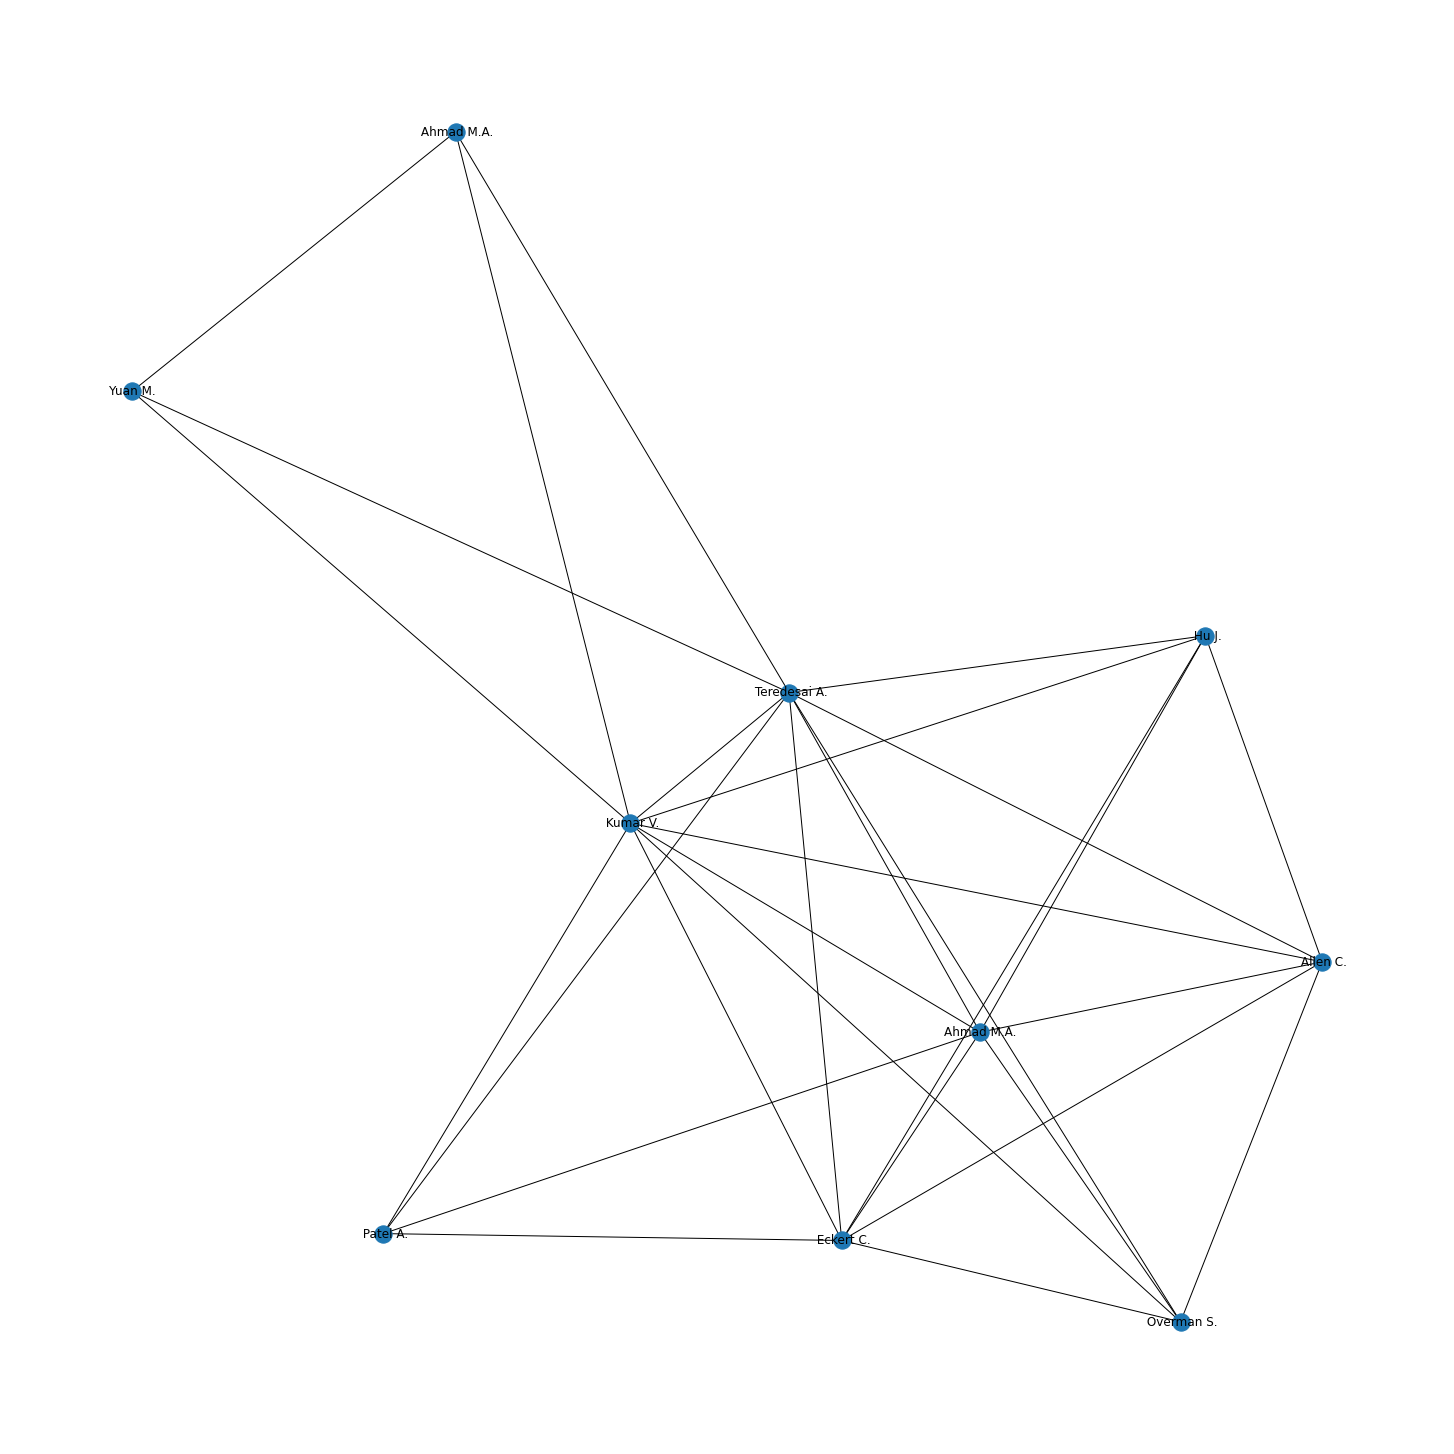

In [122]:
plt.figure(figsize = (20, 20))
nx.draw(teredesai_kumar_cliques, with_labels=True)